In [56]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import seaborn as sns

sns.set_style('darkgrid',{'axes.spines.bottom': True,
             'axes.spines.left': True,
             'axes.spines.right': True,
             'axes.spines.top': True,
             'axes.edgecolor':'.0'})

sns.set_context('talk')
sns.set_palette('colorblind')
__name__ = 'main'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# export
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import OrderedDict
from scipy.optimize import minimize
from numpy.random import multivariate_normal
from scipy.special import erf
from scipy.integrate import quad
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.stats import chi2


from pathlib import Path
Path.ls = lambda p: [i for i in p.iterdir()]

def pickleLoad(fname):
    with open(fname,'rb') as f:
        return pickle.load(f)

def pickleDump(fname,obj):
    with open(fname,'wb') as f:
        pickle.dump(obj,f,pickle.HIGHEST_PROTOCOL)
    
def toeplitzMATLAB(a,n):
    a_m = a[::-1]
    a_n = a[:n]
    return np.flipud(toeplitz(a_m,a_n))

def fullDisplay(df,max_rows=None,max_col=None,width=None):
    df_cp = df.style.set_properties( **{'width': f'{width}px'}) if width is not None else df.copy() 
    with pd.option_context('display.max_rows', max_rows, 'display.max_columns', max_col,):
        display(df_cp)

r0_str = r'$R_0$'
R0_str = r'$R_0$'
gamma_str = r'$\gamma^{-1}$'
tau_str = r'$\tau$'

In [5]:
from scipy.signal import correlate
from scipy.linalg import toeplitz

# Load data 

In [70]:
def getData(country,eDate_raw,N,country_name=None):
    
    country_name = country if country_name is None else country_name
    cases = JHU_confirmed_df[(JHU_confirmed_df['Country/Region']==country) & JHU_confirmed_df['Province/State'].isna()].iloc[:,4:]
    first_case = np.argmax((cases>0).values)
    
    sDate = cases.columns[first_case]
    n_ndays = pd.date_range(sDate,eDate_raw,freq='D').shape[0]
    eDate = cases.columns[first_case+n_ndays-1]

    cases_arr = cases.iloc[:,first_case:first_case+n_ndays].values.flatten()

    return (cases_arr,country_name,f'{country}_fit_res.txt',N,sDate,eDate)


In [71]:
#export
JHU_dir = './JHU/COVID-19'
JHU_path = Path(f'./{JHU_dir}/csse_covid_19_data/csse_covid_19_time_series/')
JHU_confirmed_path = Path(f'./{JHU_dir}/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
JHU_death_path = Path(f'./{JHU_dir}/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
JHU_recovered_path = Path(f'./{JHU_dir}/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

JHU_confirmed_df = pd.read_csv(JHU_confirmed_path);    
JHU_death_df = pd.read_csv(JHU_death_path);             
JHU_recovered_df = pd.read_csv(JHU_recovered_path);   

JHU_dfs = {'confirmed':JHU_confirmed_df,'death':JHU_death_df,'recovered':JHU_recovered_df}

In [72]:
NYT_us_cases = pd.read_csv('/opt/genomics/Jupyter_Notebook/NadavRakocz/covid19/NYT_output/time_series_us_cases_NYT.csv')

In [73]:
data = {}

## UK

In [76]:
eng_cases = JHU_confirmed_df[(JHU_confirmed_df['Country/Region']=='United Kingdom') & JHU_confirmed_df['Province/State'].isna()].iloc[:,4:]
eng_death = JHU_death_df[(JHU_death_df['Country/Region']=='United Kingdom') & JHU_confirmed_df['Province/State'].isna()].iloc[:,4:]
eng_rec = JHU_recovered_df[(JHU_recovered_df['Country/Region']=='United Kingdom') & JHU_confirmed_df['Province/State'].isna()].iloc[:,4:]

In [77]:
first_case = np.argmax((eng_cases>0).values)
sDate = eng_cases.columns[first_case]
eng_ndays = pd.date_range(sDate,'03-24-2020',freq='D').shape[0]
eDate = eng_cases.columns[first_case+eng_ndays-1]

eng_cases_arr = eng_cases.iloc[:,first_case:first_case+eng_ndays].values.flatten()
eng_death_arr = eng_death.iloc[:,first_case:first_case+eng_ndays].values.flatten()
eng_rec_arr = eng_rec.iloc[:,first_case:first_case+eng_ndays].values.flatten()

data['UK'] = (eng_cases_arr,'United Kingdom','eng_fit_res.txt',56*1e6,sDate,eDate)

                  

## Spain 

In [78]:
country = 'Spain'
spn_cases = JHU_confirmed_df[(JHU_confirmed_df['Country/Region']==country) & JHU_confirmed_df['Province/State'].isna()].iloc[:,4:]
spn_death = JHU_death_df[(JHU_death_df['Country/Region']==country) & JHU_confirmed_df['Province/State'].isna()].iloc[:,4:]
spn_rec = JHU_recovered_df[(JHU_recovered_df['Country/Region']==country) & JHU_confirmed_df['Province/State'].isna()].iloc[:,4:]

In [79]:
first_case = np.argmax((spn_cases>0).values)
sDate = spn_cases.columns[first_case]
spn_ndays = pd.date_range(sDate,'03-15-2020',freq='D').shape[0]
eDate = spn_cases.columns[first_case+spn_ndays-1]

spn_cases_arr = spn_cases.iloc[:,first_case:first_case+spn_ndays].values.flatten()
spn_death_arr = spn_death.iloc[:,first_case:first_case+spn_ndays].values.flatten()
spn_rec_arr = spn_rec.iloc[:,first_case:first_case+spn_ndays].values.flatten()

data['Spain'] = (spn_cases_arr,'Spain','spn_fit_res.txt',47*1e6,sDate,eDate)
                  

## New York

In [80]:
country='New York'
ny_cases = NYT_us_cases[NYT_us_cases.state=='New York'].iloc[:,1:]

In [81]:
first_case = np.argmax((ny_cases>0).values)
sDate = ny_cases.columns[first_case]
ny_ndays = pd.date_range(sDate,'03-20-2020',freq='D').shape[0]
eDate = ny_cases.columns[first_case+ny_ndays-1]

ny_cases_arr = ny_cases.iloc[:,first_case:first_case+ny_ndays].values.flatten()

data['NY'] = (ny_cases_arr,'New York','ny_fit_res.txt',19.5*1e6,sDate,eDate)
                  
        

## Denmark 

In [82]:
data['Denmark'] = getData('Denmark','03-11-2020',5.8*1e6)

## Germany 

In [83]:
data['Germany'] = getData('Germany','03-16-2020',83.02*1e6)

## France 

In [84]:
data['France'] = getData('France','03-16-2020',66.99*1e6)

## regions 

In [85]:
regions = ['UK','NY','Spain','France','Germany','Denmark']

# find optimal distribution of $R_0$ and $\tau$  

## Load results 

In [25]:
res_dfs = pickleLoad('res_df_mse_loss.pkl')

## likelihood as a sigma square posterior using a gamma conjugate prior

$$ P(y_k(t)\mid f(t;R_0^{(k)},\tau^{(k)}), \sigma_k^2) = \prod_{i=1}^n  (\frac{1}{2\pi\sigma_k^2})^\frac{1}{2}e^{\frac{-(y_k(t_i)-f(t_i;R_0^{(k)},\tau^{(k)}))^2}{2\sigma_k^2}} = (\frac{1}{2\pi\sigma_k^2})^\frac{n}{2}e^{\frac{-\sum(y_k(t_i)-f(t_i;R_0^{(k)},\tau^{(k)}))^2}{2\sigma_k^2}} $$

$$ P(y_k(t)\mid f(t;R_0^{(k)},\tau^{(k)}), \sigma_k^2)P(\sigma_k^2) = (\frac{1}{2\pi})^\frac{n}{2}(\frac{1}{\sigma_k^2})^{\frac{n}{2}+1}e^{\frac{-\sum(y_k(t_i)-f(t_i;R_0^{(k)},\tau^{(k)}))^2}{2\sigma_k^2}} $$

$$P(y_k(t)\mid R_0^{(k)},\tau^{(k)}) = P(y_k(t)\mid f(t;R_0^{(k)},\tau^{(k)})) = \int P(y_k(t)\mid  f(t;R_0^{(k)},\tau^{(k)}), \sigma_k^2)P(\sigma_k^2)d\sigma_k^2 $$

$$P(y_k(t)\mid R_0^{(k)},\tau^{(k)}) \propto \Gamma(\frac{n}{2})(\frac{2}{\sum_{i=1}^{n} (y_k(t_i)-f(t_i;R_0^{(k)},\tau^{(k)}))^2})^\frac{n}{2}$$

In [19]:
from scipy.special import gamma as fgamma
def mse2ll(mse,n):
    return fgamma(n/2)*(2/(n*mse))**(n/2)

## generate realization probability given prior 

$f(R_0,\gamma | \mu_r,\sigma_r,\mu_\gamma,\sigma_\gamma) =  \frac{1}{\sqrt{2\pi\sigma_r^2}}e^{\frac{-(R_0-\mu_r)^2}{2\sigma_r^2}} *  \frac{1}{\sqrt{2\pi\sigma_\gamma^2}}e^{\frac{-(\gamma-\mu_\gamma)^2}{2\sigma_\gamma^2}}$

In [20]:
def fgauss(x,mu,ss):
    return (1/np.sqrt((2*np.pi*ss)))*np.exp(-((x-mu)**2)/(2*ss))

def priors(r0s,gammas,r_mu,r_ss,gamma_mu,gamma_ss):
    r_prior = fgauss(r0s,r_mu,r_ss)
    g_prior = fgauss(gammas,g_mu,g_ss)
    return r_prior*g_prior

In [ ]:
N_rm = 71
N_rss = 71
N_gm = 30
N_gss = 30
N_priors = int(N_rm*N_rss*N_gm*N_gss); print(N_priors)
priors_mat = np.zeros((N_priors,n_pairs))
priors_indx = np.zeros((N_priors,4))
i=0


for r_mu in (np.linspace(1,8,N_rm)):
    for r_s in (np.linspace(1,8,N_rss)):
        r_ss = r_s**2
        for g_mu in (np.linspace(1,30,N_gm)):
            for g_s in (np.linspace(1,30,N_gss)):
                g_ss = g_s**2
                priors_mat[i,:] = priors(r0s,gammas,r_mu,r_ss,g_mu,g_ss)
                priors_indx[i,:] = [r_mu,r_ss,g_mu,g_ss]
                i+=1
                if(i%10000==0):
                    print(f'{(i/N_priors)*100:.2f}','%',sep='',end=', ')
    

4536900
0.22%, 0.44%, 0.66%, 0.88%, 1.10%, 1.32%, 1.54%, 1.76%, 1.98%, 2.20%, 2.42%, 2.64%, 2.87%, 3.09%, 3.31%, 3.53%, 3.75%, 3.97%, 4.19%, 4.41%, 4.63%, 4.85%, 5.07%, 5.29%, 5.51%, 5.73%, 5.95%, 6.17%, 6.39%, 6.61%, 6.83%, 7.05%, 7.27%, 7.49%, 7.71%, 7.93%, 8.16%, 8.38%, 8.60%, 8.82%, 9.04%, 9.26%, 9.48%, 9.70%, 9.92%, 10.14%, 10.36%, 10.58%, 10.80%, 11.02%, 11.24%, 11.46%, 11.68%, 11.90%, 12.12%, 12.34%, 12.56%, 12.78%, 13.00%, 13.22%, 13.45%, 13.67%, 13.89%, 14.11%, 14.33%, 14.55%, 14.77%, 14.99%, 15.21%, 15.43%, 15.65%, 15.87%, 16.09%, 16.31%, 16.53%, 16.75%, 16.97%, 17.19%, 17.41%, 17.63%, 17.85%, 18.07%, 18.29%, 18.51%, 18.74%, 18.96%, 19.18%, 19.40%, 19.62%, 19.84%, 20.06%, 20.28%, 20.50%, 20.72%, 20.94%, 21.16%, 21.38%, 21.60%, 21.82%, 22.04%, 22.26%, 22.48%, 22.70%, 22.92%, 23.14%, 23.36%, 23.58%, 23.80%, 24.03%, 24.25%, 24.47%, 24.69%, 24.91%, 25.13%, 25.35%, 25.57%, 25.79%, 26.01%, 26.23%, 26.45%, 26.67%, 26.89%, 27.11%, 27.33%, 27.55%, 27.77%, 27.99%, 28.21%, 28.43%, 28.65

## calculate final likelihood

$ P(X|\theta) = \iint_{R_0,\gamma} P(X|R_0,\gamma)P(R_0,\gamma|\theta) \,dR_0\,d\gamma $

In [28]:
#export
def getCI(priors_indx,nll,indx_names=['mu_r','ss_r','mu_g','ss_g']):
    ll_df = pd.DataFrame(priors_indx)
    ll_df.columns = indx_names
    ll_df['nll_score'] = nll
    res_df = ll_df
    chi = chi2.isf(q=1-0.95, df=1)
    print('chi_th:',chi/2)

    res_df_ci = res_df[(res_df.nll_score - res_df.nll_score.min())<chi/2]
    
    summ = pd.concat((res_df_ci.min(),res_df_ci.max()),axis=1)
    summ.columns = ['min','max']
    summ = summ.T
    
    return res_df_ci.sort_values('nll_score'),summ
    

In [37]:
region_theta_ll = np.zeros((len(regions),priors_mat.shape[0]))
region_theta_ll_dict = {}
N_REGIONS = 7

for region_i,region in enumerate(regions[:N_REGIONS]):
    print('\n',region)
    x,country,output_file,N,sDate,eDate = data[region]
    
    res_df_i = res_dfs[region_i]
    mse_score = res_df_i['score'].values
    r_g_ll_i =  mse2ll(mse_score,len(x))
    
    theta_likelihood_i = priors_mat@r_g_ll_i
    region_theta_ll[region_i,:] = theta_likelihood_i
    region_theta_ll_dict[region] = theta_likelihood_i
    
    ll_argmax = np.argmax(theta_likelihood_i)
    print(priors_indx[ll_argmax,:])
    
    display(res_df_i.sort_values('score').head())
    
    ci_df,ci_summ = getCI(priors_indx,-np.log(theta_likelihood_i))
    display(ci_summ)
#     display(ci_df.describe().iloc[1:,:])

    
    

    


 UK
[ 7.5  1.  27.   1. ]


,$R_0$,$\gamma^{-1}$,score,shift,alpha,endDist
5047,7.5758,27.0,22073.588964,12.0,1.0,327.0
5101,7.6465,27.0,22094.324074,12.0,1.0,325.0
4993,7.5051,27.0,22186.320926,12.0,1.0,329.0
5155,7.7172,27.0,22249.763833,12.0,1.0,323.0
4939,7.4343,27.0,22431.289108,12.0,1.0,331.0


chi_th: 1.920729410347062


,mu_r,ss_r,mu_g,ss_g,nll_score
min,3.1,1.00,22.0,1.0,297.599302
max,8.0,51.84,30.0,81.0,299.520000



 NY
[7.8 1.  4.  1. ]


,$R_0$,$\gamma^{-1}$,score,shift,alpha,endDist
5348,8.0000,4.0,67703.695247,5.0,1.0,74.0
5294,7.9293,4.0,68787.104876,5.0,1.0,75.0
5240,7.8586,4.0,70101.166914,5.0,1.0,75.0
5186,7.7879,4.0,71643.722461,5.0,1.0,76.0
5132,7.7172,4.0,73412.621318,5.0,1.0,76.0


chi_th: 1.920729410347062


,mu_r,ss_r,mu_g,ss_g,nll_score
min,3.2,1.00,1.0,1.0,121.713376
max,8.0,53.29,8.0,36.0,123.634105



 Sweden
[1.5 1.  8.  1. ]


,$R_0$,$\gamma^{-1}$,score,shift,alpha,endDist
384,1.4949,8.0,84733.588181,44.0,1.0,1107.0
439,1.5657,9.0,86594.244630,45.0,1.0,1382.0
219,1.2828,5.0,88484.298381,40.0,1.0,384.0
713,1.9192,13.0,90372.242587,47.0,1.0,1449.0
658,1.8485,12.0,90554.864952,46.0,1.0,1459.0


chi_th: 1.920729410347062


,mu_r,ss_r,mu_g,ss_g,nll_score
min,1.0,1.00,3.0,1.0,527.261992
max,5.6,46.24,14.0,81.0,529.182693



 Spain
[ 7.5  1.  11.   1. ]


,$R_0$,$\gamma^{-1}$,score,shift,alpha,endDist
5085,7.6465,11.0,48559.783510,7.0,1.0,152.0
5139,7.7172,11.0,48568.663031,7.0,1.0,151.0
5031,7.5758,11.0,48655.129986,7.0,1.0,153.0
5193,7.7879,11.0,48682.527198,7.0,1.0,150.0
4977,7.5051,11.0,48853.946593,7.0,1.0,154.0


chi_th: 1.920729410347062


,mu_r,ss_r,mu_g,ss_g,nll_score
min,2.7,1.00,7.0,1.0,259.530256
max,8.0,59.29,15.0,49.0,261.450978



 France
[ 7.2  1.  29.   1. ]


,$R_0$,$\gamma^{-1}$,score,shift,alpha,endDist
5379,8.0000,35.0,30103.065054,11.0,1.0,399.0
5325,7.9293,35.0,30359.291985,11.0,1.0,402.0
5271,7.8586,35.0,30649.695973,11.0,1.0,404.0
5108,7.6465,34.0,30877.292336,11.0,1.0,400.0
5162,7.7172,34.0,30895.672339,11.0,1.0,398.0


chi_th: 1.920729410347062


,mu_r,ss_r,mu_g,ss_g,nll_score
min,2.4,1.00,17.0,1.0,300.985049
max,8.0,62.41,30.0,676.0,302.905771



 Germany
[ 7.6  1.  28.   1. ]


,$R_0$,$\gamma^{-1}$,score,shift,alpha,endDist
5372,8.0000,28.0,39209.780002,9.0,1.0,326.0
5318,7.9293,28.0,39410.501753,9.0,1.0,328.0
5264,7.8586,28.0,39645.906168,9.0,1.0,330.0
5210,7.7879,28.0,39915.813906,9.0,1.0,332.0
5156,7.7172,28.0,40220.046132,9.0,1.0,334.0


chi_th: 1.920729410347062


,mu_r,ss_r,mu_g,ss_g,nll_score
min,3.2,1.00,20.0,1.0,289.987725
max,8.0,51.84,30.0,100.0,291.908424



 Denmark
[7.3 1.  5.  1. ]


,$R_0$,$\gamma^{-1}$,score,shift,alpha,endDist
5349,8.0000,5.0,232.705550,2.0,1.0,84.0
5295,7.9293,5.0,233.529405,2.0,1.0,85.0
5241,7.8586,5.0,234.450926,2.0,1.0,85.0
5187,7.7879,5.0,235.470014,2.0,1.0,86.0
5133,7.7172,5.0,236.586573,2.0,1.0,87.0


chi_th: 1.920729410347062


,mu_r,ss_r,mu_g,ss_g,nll_score
min,1.9,1.0,1.0,1.0,44.307908
max,8.0,64.0,9.0,49.0,46.228627


In [38]:
pickleDump('region_theta_ll.pkl',region_theta_ll)
pickleDump('priors_indx.pkl',priors_indx)
pickleDump('region_theta_ll_dict.pkl',region_theta_ll_dict)

In [39]:
theta_loglikelihood = np.log(region_theta_ll).sum(axis=0)

ll_argmax = np.argmax(theta_loglikelihood)
print(priors_indx[ll_argmax,:])

[  6.3    4.41  16.   121.  ]


## Sensitivity 

In [40]:
from itertools import combinations
import scipy.stats as stats

In [83]:
i=0
final_params = []
final_params_regions = []
for comb_i in combinations(np.arange(7),4):
    
    print(np.array(regions)[list(comb_i)])
    region_theta_ll_combi = region_theta_ll[list(comb_i),:]
    theta_loglikelihood = np.log(region_theta_ll_combi).sum(axis=0)
    
    ll_argmax = np.argmax(theta_loglikelihood)
    print(priors_indx[ll_argmax,:])
    final_params.append(priors_indx[ll_argmax,:])
    final_params_regions.append(np.array(regions)[list(comb_i)])
    
    
    i+=1
    
    
print(i)
    

['UK' 'NY' 'Sweden' 'Spain']
[ 5.7   6.76 12.   81.  ]
['UK' 'NY' 'Sweden' 'France']
[  5.7    6.76  18.   144.  ]
['UK' 'NY' 'Sweden' 'Germany']
[  5.7    6.76  16.   100.  ]
['UK' 'NY' 'Sweden' 'Denmark']
[ 5.6   6.25 11.   81.  ]
['UK' 'NY' 'Spain' 'France']
[  7.5   1.   19.  144. ]
['UK' 'NY' 'Spain' 'Germany']
[  7.5   1.   17.  100. ]
['UK' 'NY' 'Spain' 'Denmark']
[ 7.5  1.  12.  81. ]
['UK' 'NY' 'France' 'Germany']
[  7.5   1.   22.  121. ]
['UK' 'NY' 'France' 'Denmark']
[  7.5   1.   17.  169. ]
['UK' 'NY' 'Germany' 'Denmark']
[  7.5   1.   15.  121. ]
['UK' 'Sweden' 'Spain' 'France']
[  5.7    6.25  19.   100.  ]
['UK' 'Sweden' 'Spain' 'Germany']
[ 5.8   6.25 18.   64.  ]
['UK' 'Sweden' 'Spain' 'Denmark']
[ 5.7   6.25 13.   64.  ]
['UK' 'Sweden' 'France' 'Germany']
[ 5.8   6.25 23.   81.  ]
['UK' 'Sweden' 'France' 'Denmark']
[  5.7    6.25  18.   144.  ]
['UK' 'Sweden' 'Germany' 'Denmark']
[  5.7    6.25  16.   100.  ]
['UK' 'Spain' 'France' 'Germany']
[ 7.4  1.  24.  64. ]
[

### Save data frame 

In [85]:
final_par_df = pd.DataFrame(np.array(final_params),columns=['mu_r','ss_r','mu_g','ss_g'])
final_par_df['regions'] = final_params_regions
final_par_df.to_csv('final_params.csv',index=False)
final_par_df

,mu_r,ss_r,mu_g,ss_g,regions
0,5.7,6.76,12.0,81.0,"[UK, NY, Sweden, Spain]"
1,5.7,6.76,18.0,144.0,"[UK, NY, Sweden, France]"
2,5.7,6.76,16.0,100.0,"[UK, NY, Sweden, Germany]"
3,5.6,6.25,11.0,81.0,"[UK, NY, Sweden, Denmark]"
4,7.5,1.00,19.0,144.0,"[UK, NY, Spain, France]"
5,7.5,1.00,17.0,100.0,"[UK, NY, Spain, Germany]"
6,7.5,1.00,12.0,81.0,"[UK, NY, Spain, Denmark]"
7,7.5,1.00,22.0,121.0,"[UK, NY, France, Germany]"
8,7.5,1.00,17.0,169.0,"[UK, NY, France, Denmark]"
9,7.5,1.00,15.0,121.0,"[UK, NY, Germany, Denmark]"


### Get summary stats from R sampled simulations 

In [144]:
sim_dir_sens = Path('r_gamma_sims_dist_sens_std/')

sim_dirs = [f for f in sim_dir_sens.ls() if f.is_dir()]
len(sim_dirs)

35

3/11/2020
['UK' 'NY' 'Sweden' 'Spain']
80.0, 237.0
2020-07-16 00:00:00, 237.0
['UK' 'NY' 'Sweden' 'France']
80.0, 307.0
2020-11-24 00:00:00, 307.0
['UK' 'NY' 'Sweden' 'Germany']
80.0, 267.0
2020-09-20 00:00:00, 267.0
['UK' 'NY' 'Sweden' 'Denmark']
80.0, 232.0
2020-07-16 00:00:00, 232.0
['UK' 'NY' 'Spain' 'France']
80.0, 249.0
2021-01-29 00:00:00, 249.0
['UK' 'NY' 'Spain' 'Germany']
80.0, 239.0
2020-09-20 00:00:00, 239.0
['UK' 'NY' 'Spain' 'Denmark']
80.0, 176.0
2020-09-20 00:00:00, 176.0
['UK' 'NY' 'France' 'Germany']
80.0, 273.0
2020-11-24 00:00:00, 273.0
['UK' 'NY' 'France' 'Denmark']
80.0, 252.0
2021-01-29 00:00:00, 252.0
['UK' 'NY' 'Germany' 'Denmark']
80.0, 211.0
2020-09-20 00:00:00, 211.0
['UK' 'Sweden' 'Spain' 'France']
80.0, 345.0
2020-11-24 00:00:00, 345.0
['UK' 'Sweden' 'Spain' 'Germany']
80.0, 298.0
2020-11-24 00:00:00, 298.0
['UK' 'Sweden' 'Spain' 'Denmark']
80.0, 236.0
2020-09-20 00:00:00, 236.0
['UK' 'Sweden' 'France' 'Germany']
80.0, 357.0
2021-01-29 00:00:00, 357.0
['UK

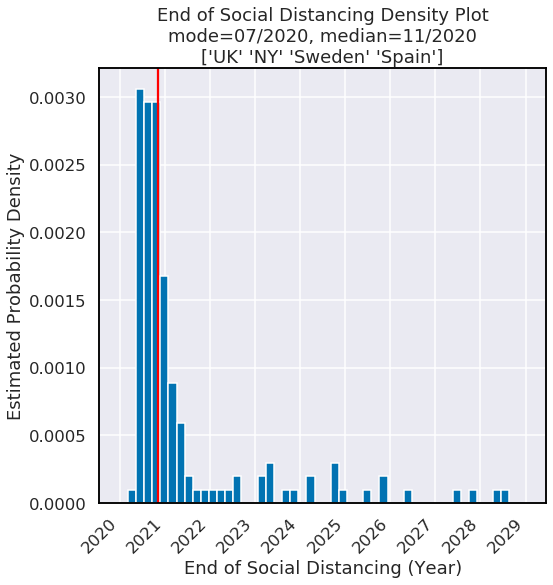

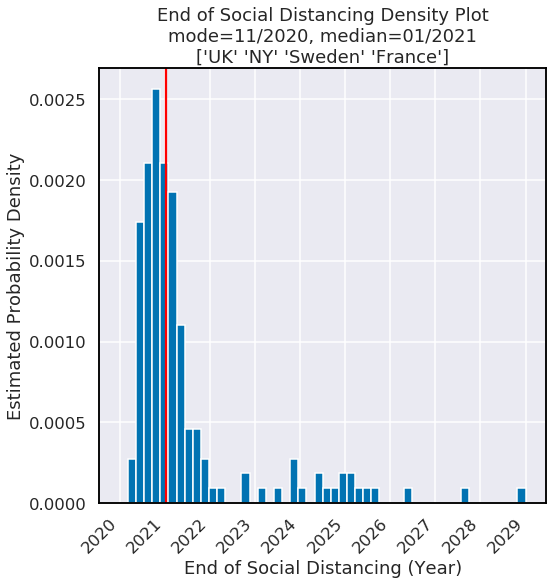

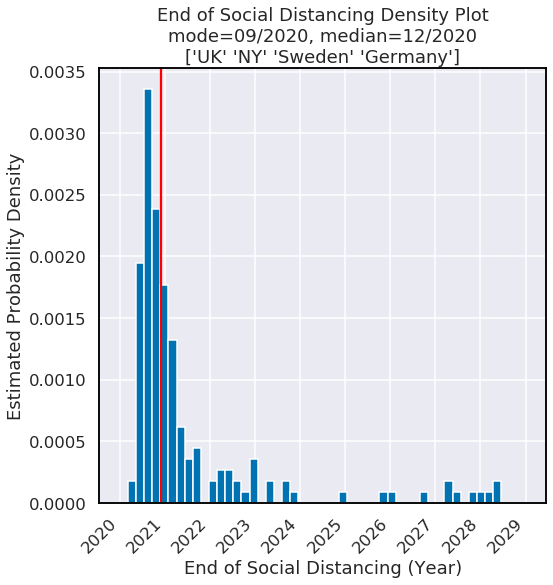

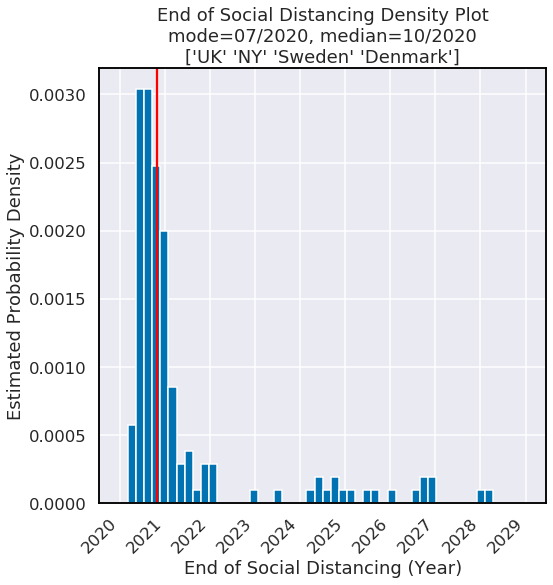

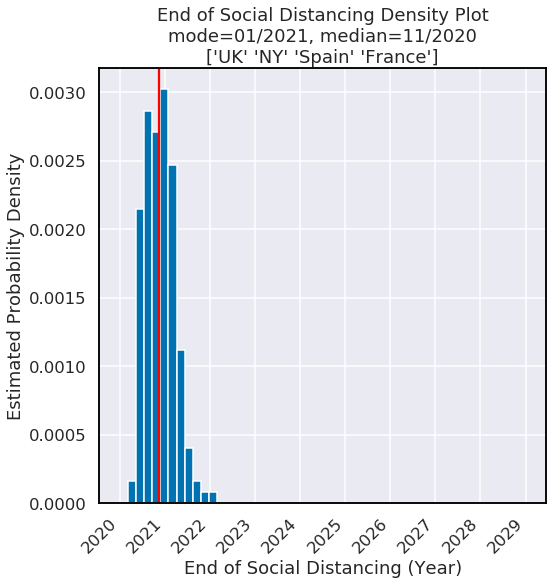

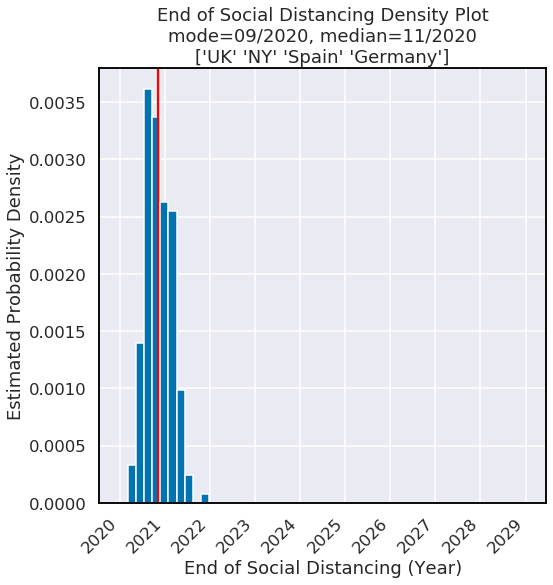

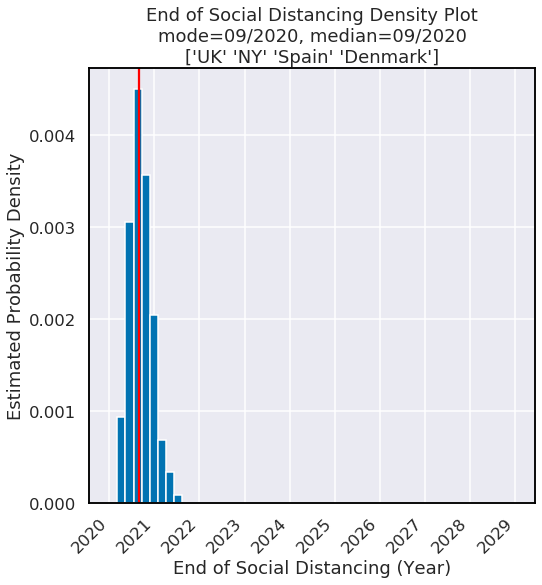

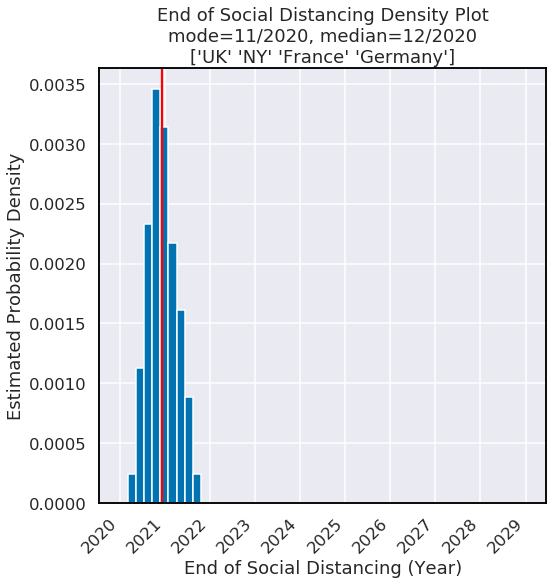

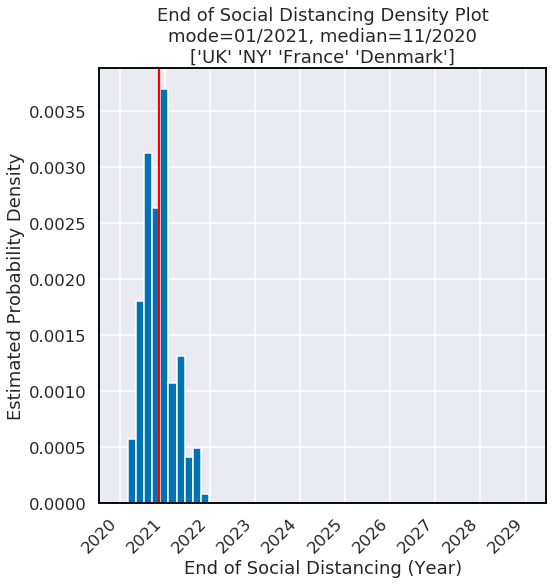

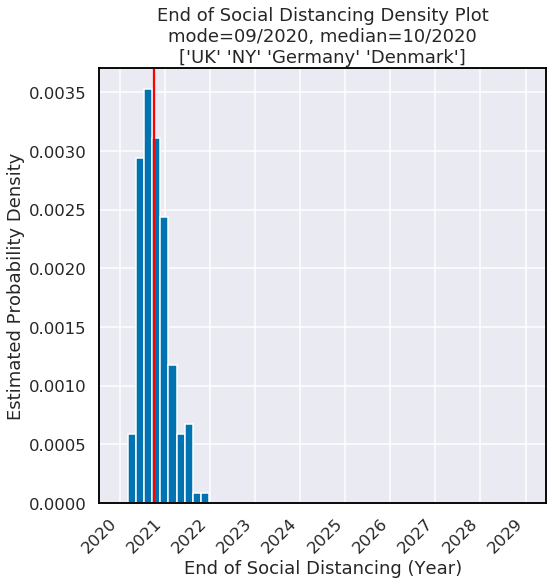

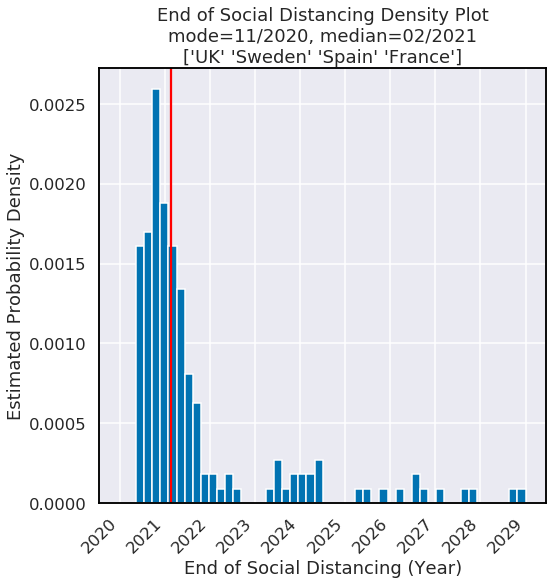

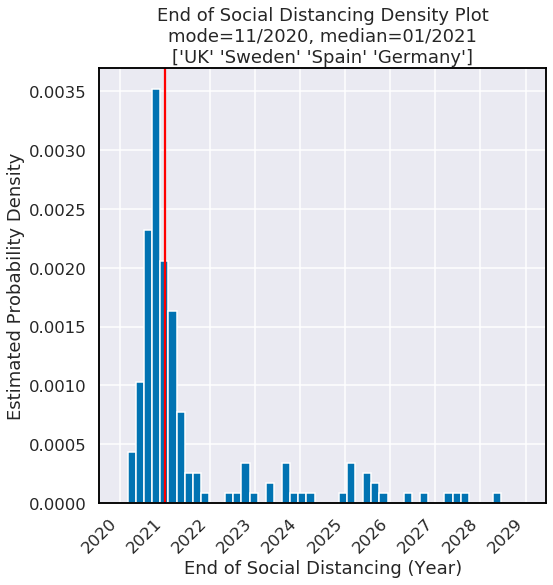

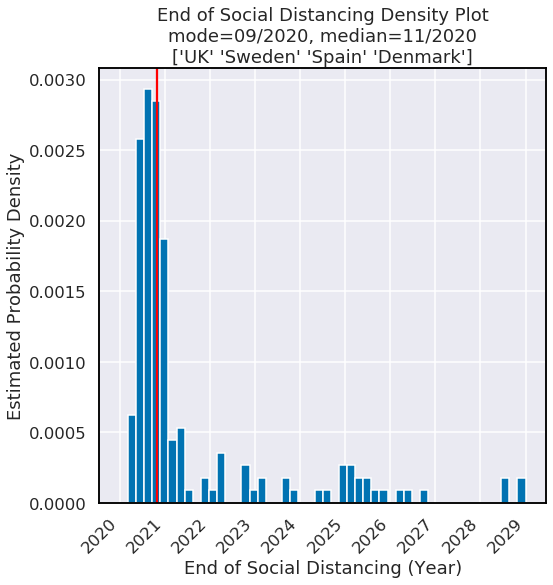

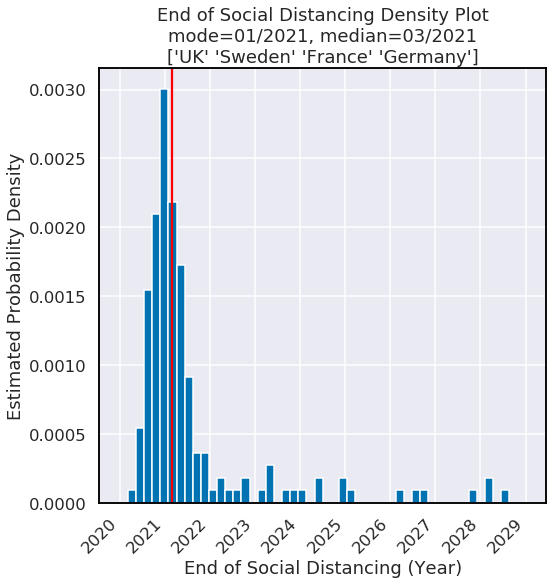

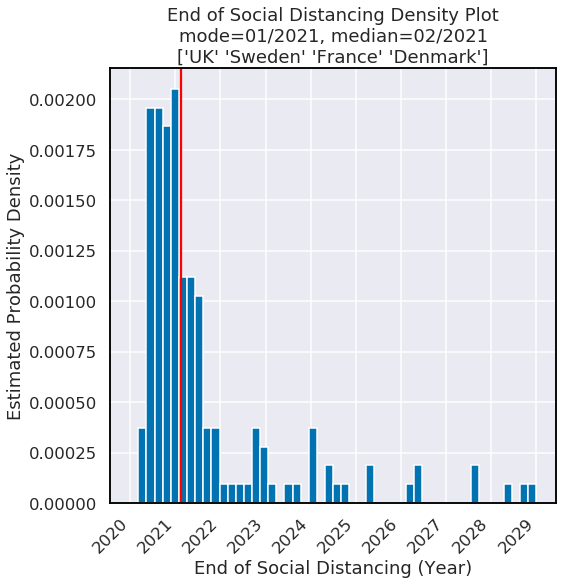

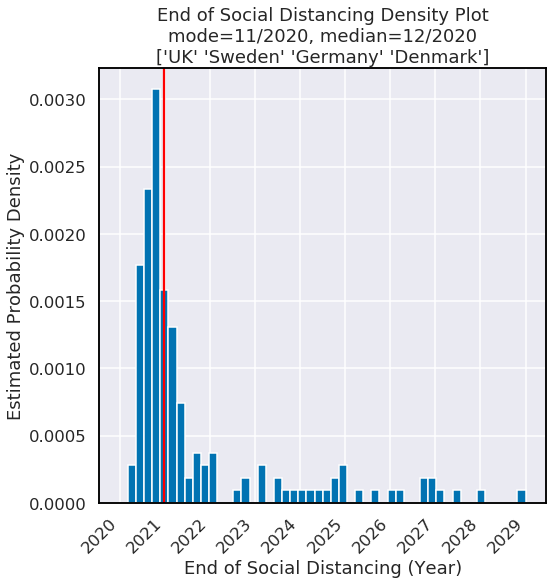

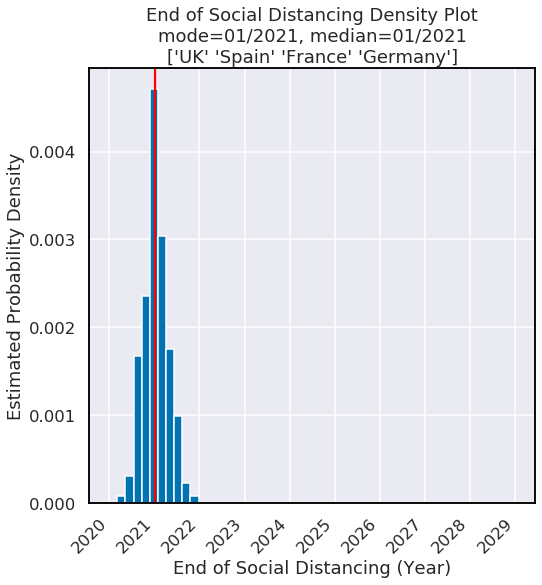

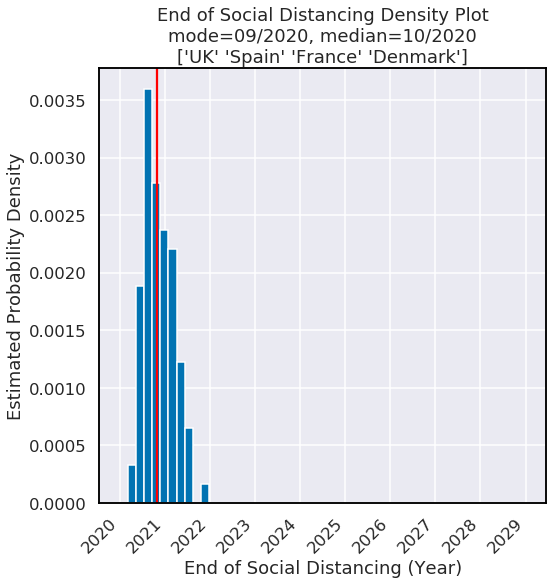

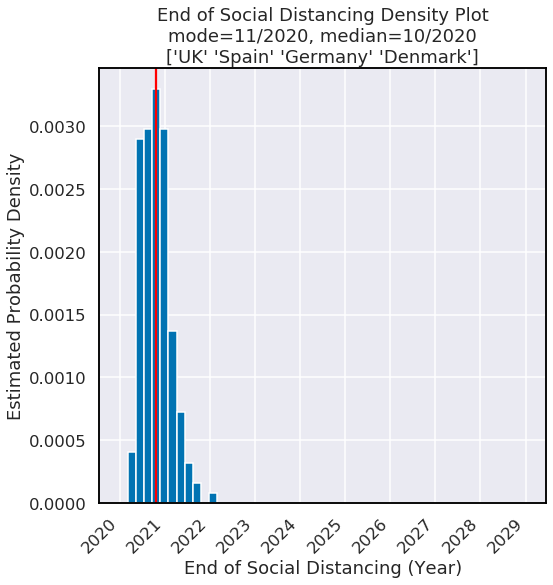

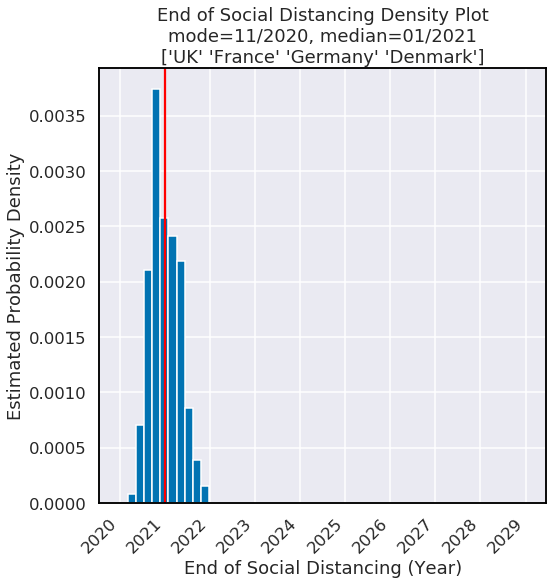

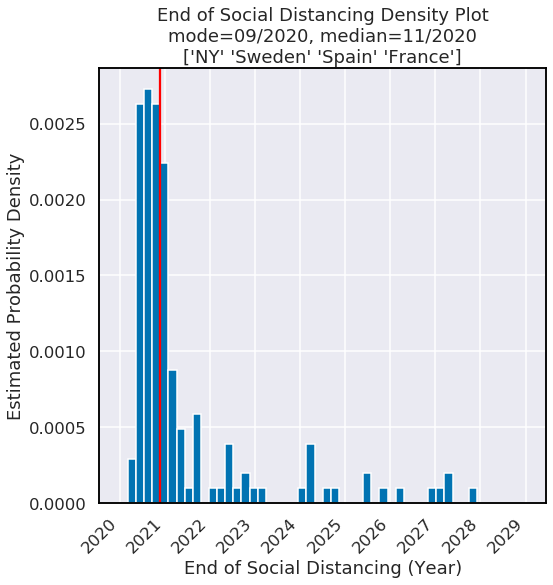

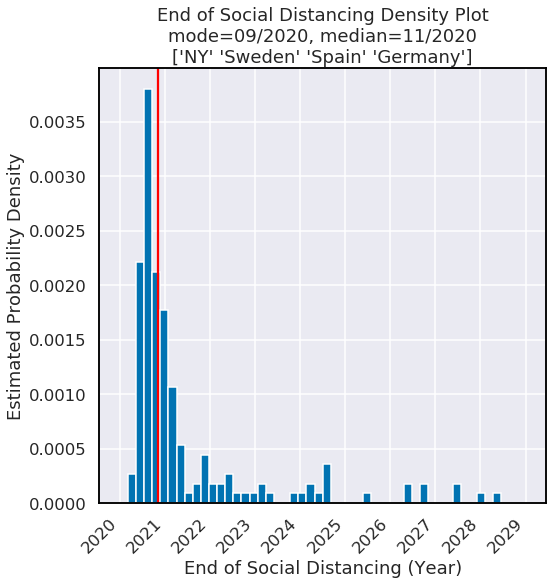

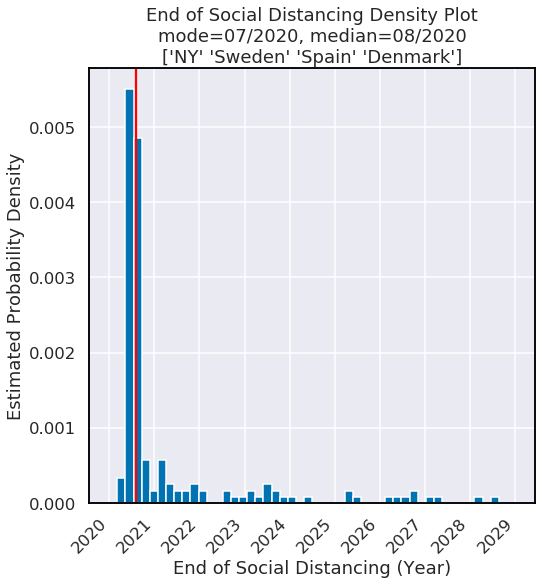

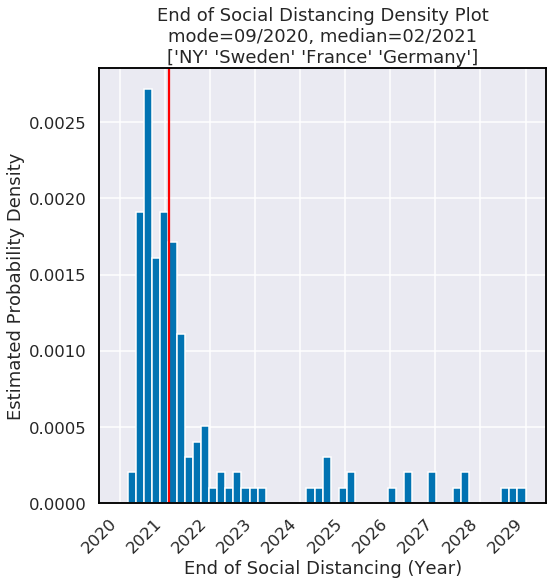

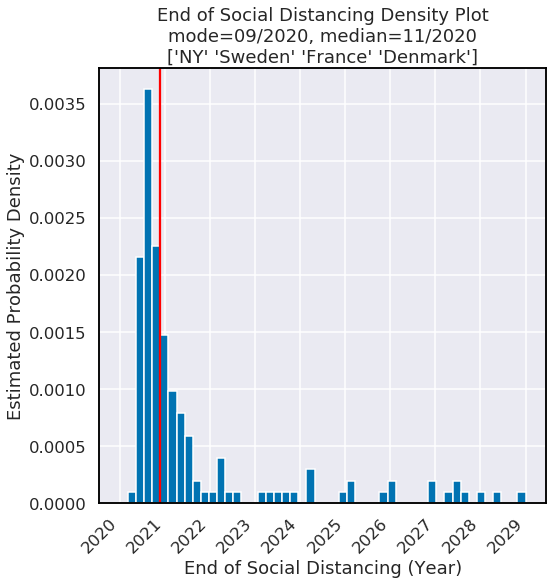

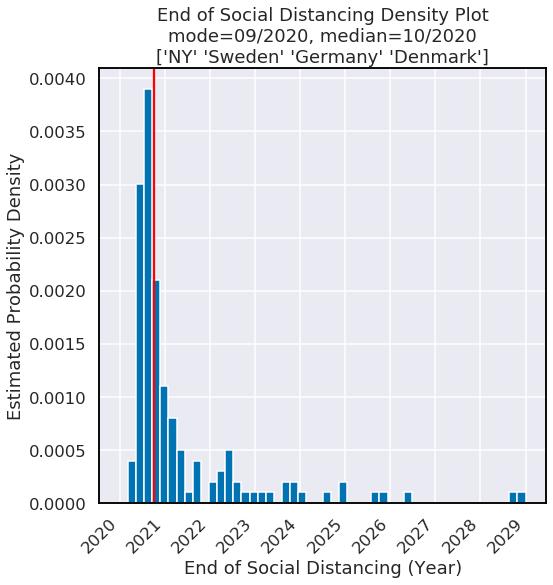

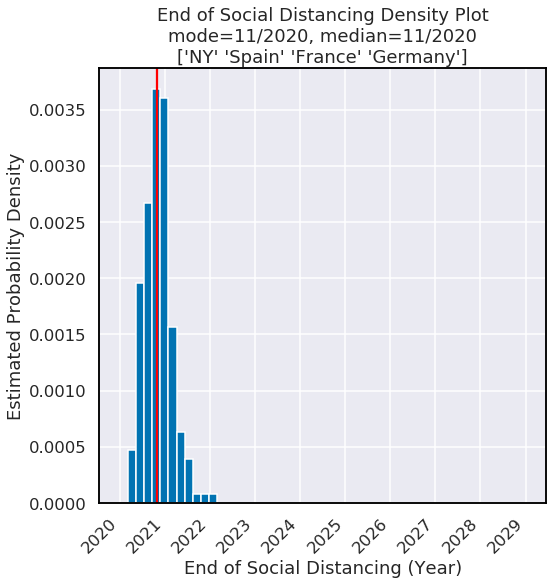

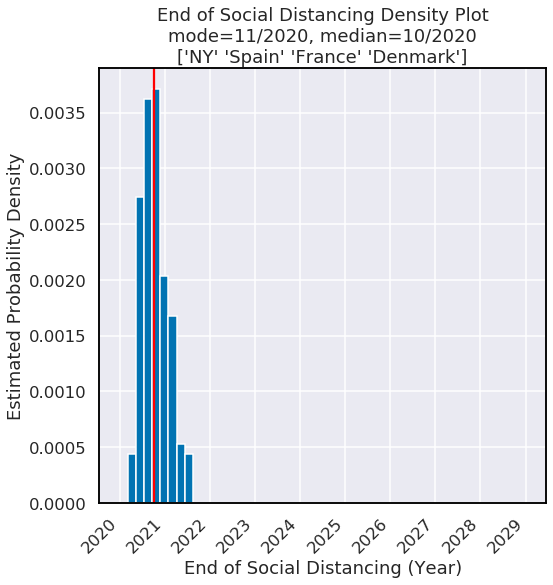

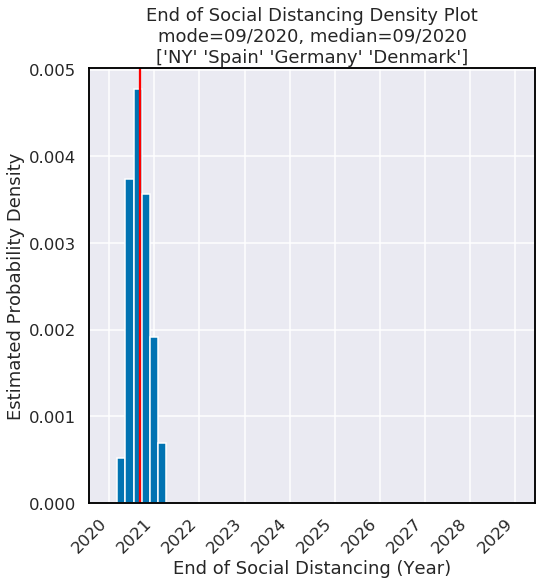

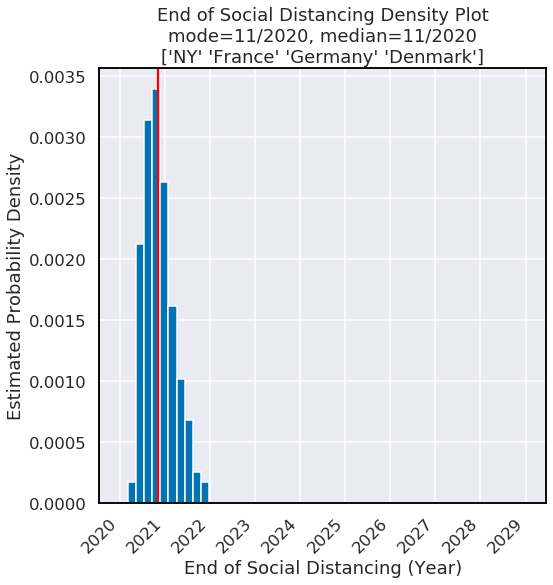

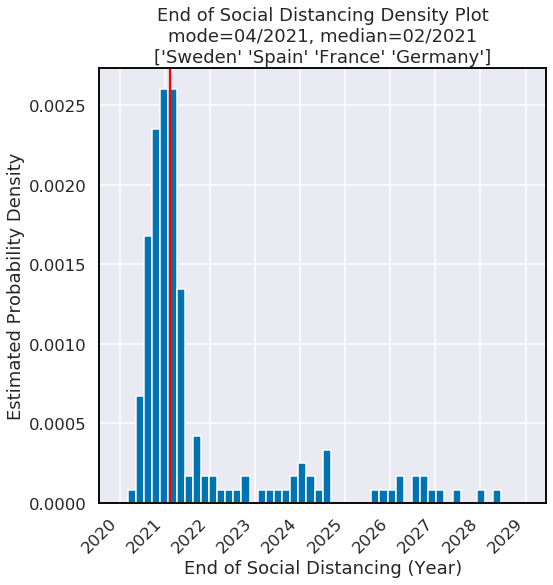

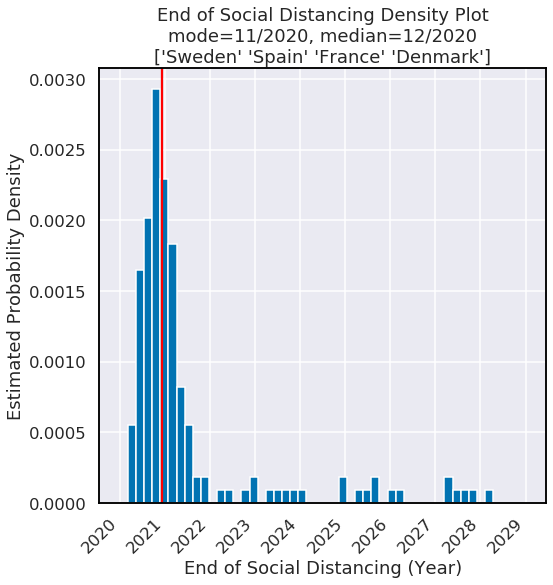

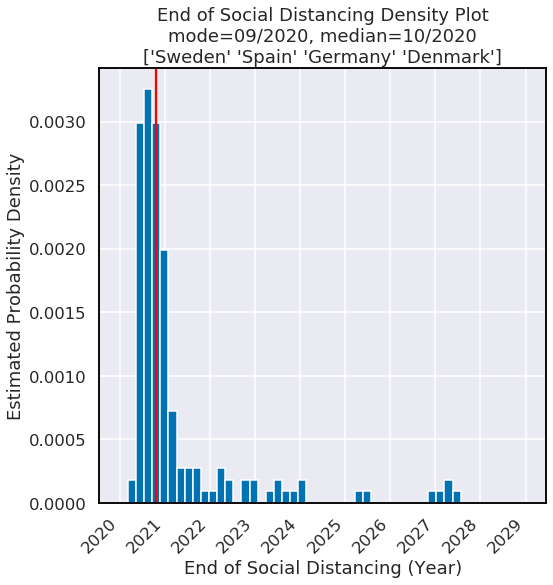

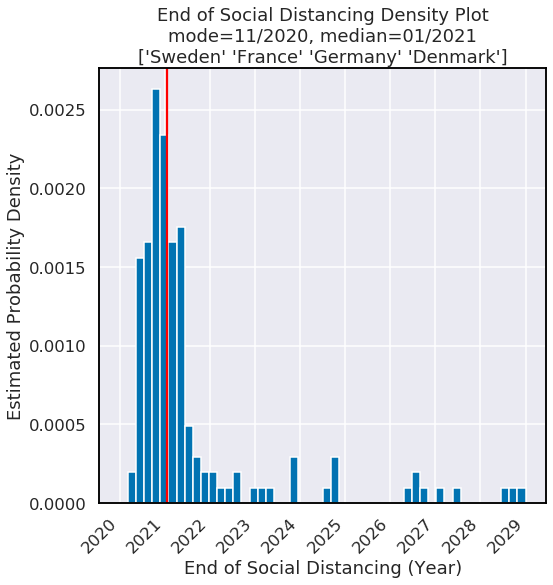

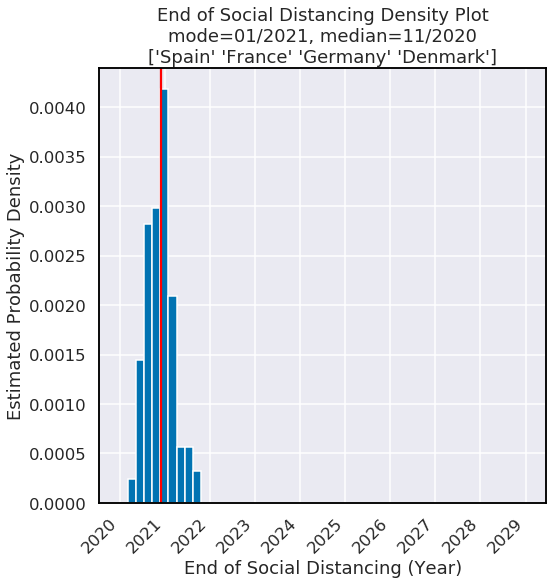

In [285]:
sim_date = '3/11/2020'; print(sim_date)
WITH_SWEDEN = False
modes = []
meds2 = []
meds = []


for sim_dir in sim_dirs:
    sim_files = [f for f in sim_dir.ls() if f.is_file()]
    comb_index = int(sim_dir.name.split('_')[-3])-1
    comb_regions = final_par_df.regions.iloc[comb_index]
    print(comb_regions)
    
    endDist_l = []
    endDist_l2 = []
    for file_name in sim_files:
        gamma = float(file_name.stem.split('_')[-1])
        r0 = float(file_name.stem.split('_')[2])
        endDist = float(file_name.stem.split('_')[4])
        endDist_l.append(endDist)
        endDist_l2.append(pd.date_range(sim_date,periods=endDist,freq='D')[-1])
        
    max_date = np.max(endDist_l)*0.99
    mode_array = np.array(endDist_l)[endDist_l < max_date]

    end_mean = np.mean(endDist_l); end_mean_date = pd.date_range(sim_date,periods=end_mean,freq='D')[-1]
    end_med = np.median(endDist_l); end_med_date = pd.date_range(sim_date,periods=end_med,freq='D')[-1]

    print(end_mode,end_med,sep=', ' )
    
    fig,ax = plt.subplots(figsize=(8,8))
    
    a = ax.hist(endDist_l2,bins=50,range=('2020','2029'),density=True,)
    end_mode_date = datetime.fromordinal(int(a[1][np.argmax(a[0])+1]))
    print(end_mode_date,end_med,sep=', ' )
    
    _ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_xlabel(f'End of Social Distancing (Year)')
    ax.set_ylabel('Estimated Probability Density')
    ax.set_title(f'End of Social Distancing Density Plot\nmode={end_mode_date.strftime("%m/%Y")}, median={end_med_date.strftime("%m/%Y")}\n{comb_regions}')
    ax.axvline(end_med_date,color='r')
    
    if(('Sweden' not in comb_regions) or  WITH_SWEDEN ):
        modes.append(end_mode_date)
        meds.append(end_med)
        meds2.append(end_med_date)
        

Text(0, 0.5, 'End of Social Distancing Median Value')

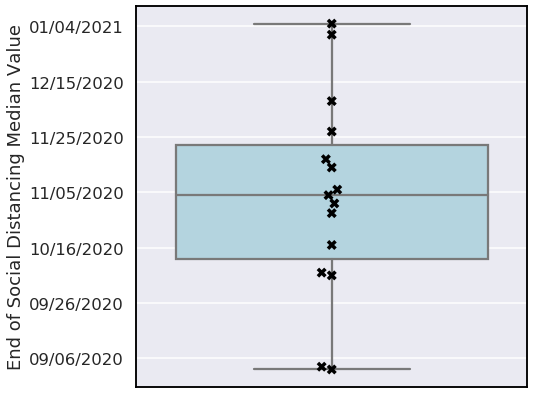

In [328]:
fig,ax = plt.subplots(figsize=(7,7))

sns.swarmplot(meds,ax=ax,orient='v',size=10,marker='X',color='k',label='different combination of regions')
sns.boxplot(meds,orient='v',color='lightblue')
ticks = ax.get_yticks()
y_ticks = [pd.date_range(sim_date,periods=i,freq='D')[-1].strftime("%m/%d/%Y") for i in ticks]
ax.set_yticklabels(y_ticks)
ax.set_ylabel('End of Social Distancing Median Value')

## social distancing affect

In [334]:
sim_dir = Path('r_gamma_sims_dist_social_nu46_long_nswd/')

sim_files = [f for f in sim_dir.ls() if f.is_file()]
len(sim_dirs)

endDist_l = []
endDist_l2 = []
for file_name in sim_files:
    gamma = float(file_name.stem.split('_')[-1])
    r0 = float(file_name.stem.split('_')[2])
    endDist = float(file_name.stem.split('_')[4])
    endDist_l.append(endDist)
    endDist_l2.append(pd.date_range(sim_date,periods=endDist,freq='D')[-1])

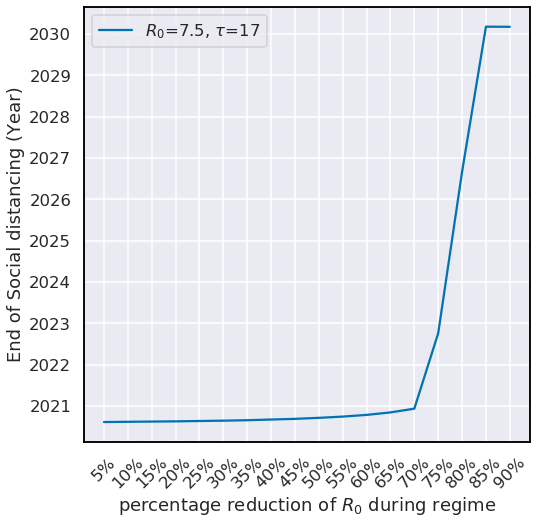

In [338]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot([f'{i}%' for i in np.arange(1,19)*5],endDist_l2,label=f'{R0_str}=7.5, {tau_str}=17')
_ = plt.setp(ax.get_xticklabels(), rotation=45)
# ax.set_title(f'End of Social Distancing regime as a function of {R0_str} percentage during regime')
ax.set_xlabel(f'percentage reduction of {R0_str} during regime')
ax.set_ylabel('End of Social distancing (Year)')
ax.legend()

# plot fits

In [149]:
from exp.nb_FitSEIR import findBestShift

## choose directory with sampled simulations 

In [154]:
sim_dir = Path('r_gamma_sims_dist_nu46_long_nswd/')

sim_files = [f for f in sim_dir.ls() if f.is_file()]
len(sim_files)

188

## fit 

In [155]:
regions_plot = ['UK', 'NY', 'Spain', 'France', 'Germany', 'Denmark']

UK
1/31/20 3/24/20
UK	6.3806	36.7294	3/11/2020	07/2021
6.3806 36.7294 15 1 489.0
UK	8.307	21.3659	3/11/2020	11/2020
8.307 21.3659 10 1 250.0
UK	4.9068	29.2527	3/11/2020	07/2021
4.9068 29.2527 13 1 508.0
UK	6.5194	19.7416	3/11/2020	12/2020
6.5194 19.7416 10 1 277.0
UK	8.2167	31.0352	3/11/2020	02/2021
8.2167 31.0352 13 1 352.0
UK	8.2038	22.6923	3/11/2020	12/2020
8.2038 22.6923 11 1 266.0
UK	7.6	29.8114	3/11/2020	03/2021
7.6 29.8114 13 1 356.0
UK	7.342	21.3665	3/11/2020	12/2020
7.342 21.3665 11 1 271.0
UK	7.2538	5.9709	3/11/2020	06/2020
7.2538 5.9709 5 1 101.0
UK	7.0129	10.0432	3/11/2020	08/2020
7.0129 10.0432 7 1 151.0
UK	8.033	32.3497	3/11/2020	03/2021
8.033 32.3497 13 1 371.0
UK	6.8098	5.9959	3/11/2020	06/2020
6.8098 5.9959 5 1 107.0
UK	9.6127	22.5897	3/11/2020	11/2020
9.6127 22.5897 10 1 243.0
UK	8.0942	12.2916	3/11/2020	08/2020
8.0942 12.2916 7 1 159.0
UK	7.9559	2.9043	3/11/2020	05/2020
7.9559 2.9043 3 1 64.0
UK	7.4454	16.8854	3/11/2020	10/2020
7.4454 16.8854 9 1 219.0
UK	7.0957	2.10

UK	8.3876	7.3506	3/11/2020	06/2020
8.3876 7.3506 5 1 105.0
UK	8.1605	9.3572	3/11/2020	07/2020
8.1605 9.3572 6 1 128.0
UK	7.5671	2.2239	3/11/2020	05/2020
7.5671 2.2239 2 1 59.0
UK	6.9184	1.6623	3/11/2020	05/2020
6.9184 1.6623 2 1 56.0
UK	7.3467	2.432	3/11/2020	05/2020
7.3467 2.432 2 1 62.0
UK	7.758	17.3404	3/11/2020	10/2020
7.758 17.3404 9 1 218.0
UK	7.2709	16.0459	3/11/2020	10/2020
7.2709 16.0459 9 1 214.0
UK	6.4114	8.2885	3/11/2020	07/2020
6.4114 8.2885 6 1 140.0
UK	9.306	20.2604	3/11/2020	10/2020
9.306 20.2604 10 1 224.0
UK	9.5946	34.2649	3/11/2020	02/2021
9.5946 34.2649 13 1 355.0
UK	5.7171	2.6638	3/11/2020	05/2020
5.7171 2.6638 3 1 80.0
UK	7.8962	7.4525	3/11/2020	06/2020
7.8962 7.4525 5 1 111.0
UK	6.591	3.7742	3/11/2020	06/2020
6.591 3.7742 4 1 84.0
UK	8.1207	16.5669	3/11/2020	09/2020
8.1207 16.5669 9 1 204.0
UK	9.2033	12.1875	3/11/2020	08/2020
9.2033 12.1875 7 1 146.0
UK	8.0213	28.9156	3/11/2020	02/2021
8.0213 28.9156 12 1 335.0
UK	8.281	1.4098	3/11/2020	04/2020
8.281 1.4098 1 1 4

UK	6.22	19.8409	3/11/2020	12/2020
6.22 19.8409 10 1 289.0
UK	8.3413	10.2918	3/11/2020	07/2020
8.3413 10.2918 7 1 136.0
UK	8.9069	32.3238	3/11/2020	02/2021
8.9069 32.3238 13 1 349.0
UK	8.146	14.7411	3/11/2020	09/2020
8.146 14.7411 8 1 184.0
UK	7.408	7.6534	3/11/2020	07/2020
7.408 7.6534 6 1 118.0
UK	7.947	23.0432	3/11/2020	12/2020
7.947 23.0432 11 1 275.0
UK	7.2671	18.5577	3/11/2020	11/2020
7.2671 18.5577 10 1 242.0
UK	6.8452	10.8534	3/11/2020	08/2020
6.8452 10.8534 7 1 163.0
UK	6.5108	2.7733	3/11/2020	05/2020
6.5108 2.7733 3 1 73.0
UK	6.1991	17.4485	3/11/2020	11/2020
6.1991 17.4485 10 1 259.0
UK	6.7609	24.0041	3/11/2020	01/2021
6.7609 24.0041 11 1 319.0
UK	8.0064	24.9526	3/11/2020	12/2020
8.0064 24.9526 11 1 294.0
UK	8.493	18.3049	3/11/2020	10/2020
8.493 18.3049 9 1 216.0
UK	8.3497	33.9291	3/11/2020	03/2021
8.3497 33.9291 13 1 378.0
UK	8.5719	18.9165	3/11/2020	10/2020
8.5719 18.9165 10 1 221.0
UK	6.7491	19.3493	3/11/2020	11/2020
6.7491 19.3493 10 1 265.0
UK	6.3175	33.6502	3/11/2020	06/

UK	7.1588	14.6695	3/11/2020	09/2020
7.1588 14.6695 8 1 200.0
UK	6.2682	10.4712	3/11/2020	08/2020
6.2682 10.4712 7 1 170.0
UK	7.8021	6.1643	3/11/2020	06/2020
7.8021 6.1643 5 1 98.0
UK	7.3831	21.6859	3/11/2020	12/2020
7.3831 21.6859 11 1 274.0
UK	8.7773	19.7941	3/11/2020	10/2020
8.7773 19.7941 10 1 227.0
UK	6.0555	13.2333	3/11/2020	10/2020
6.0555 13.2333 8 1 211.0
UK	6.8397	17.9828	3/11/2020	11/2020
6.8397 17.9828 10 1 246.0
UK	7.2823	6.4054	3/11/2020	06/2020
7.2823 6.4054 5 1 106.0
UK	8.3041	22.0456	3/11/2020	11/2020
8.3041 22.0456 10 1 257.0
UK	7.2313	4.5693	3/11/2020	06/2020
7.2313 4.5693 4 1 86.0
UK	6.5618	14.1442	3/11/2020	10/2020
6.5618 14.1442 8 1 208.0
UK	7.2101	9.4265	3/11/2020	07/2020
7.2101 9.4265 6 1 140.0
UK	9.6165	21.0313	3/11/2020	10/2020
9.6165 21.0313 10 1 228.0
UK	7.8722	14.8954	3/11/2020	09/2020
7.8722 14.8954 8 1 190.0
UK	7.0126	24.7217	3/11/2020	01/2021
7.0126 24.7217 12 1 319.0
UK	7.7548	20.3311	3/11/2020	11/2020
7.7548 20.3311 10 1 250.0
UK	8.3409	11.4268	3/11/2020

UK	9.7466	35.6247	3/11/2020	03/2021
9.7466 35.6247 13 1 365.0
UK	6.699	21.9663	3/11/2020	01/2021
6.699 21.9663 11 1 297.0
UK	7.1151	1.1063	3/11/2020	04/2020
7.1151 1.1063 1 1 48.0
UK	8.3983	7.7703	3/11/2020	06/2020
8.3983 7.7703 5 1 109.0
UK	7.7334	13.1738	3/11/2020	08/2020
7.7334 13.1738 8 1 174.0
UK	7.0155	22.1428	3/11/2020	12/2020
7.0155 22.1428 11 1 289.0
UK	8.0897	19.613	3/11/2020	11/2020
8.0897 19.613 10 1 236.0
UK	5.6259	21.4736	3/11/2020	02/2021
5.6259 21.4736 11 1 337.0
UK	5.8823	9.9969	3/11/2020	08/2020
5.8823 9.9969 7 1 174.0
UK	8.6816	15.4358	3/11/2020	09/2020
8.6816 15.4358 8 1 184.0
UK	5.2996	27.8967	3/11/2020	06/2021
5.2996 27.8967 13 1 449.0
UK	8.8275	20.9262	3/11/2020	11/2020
8.8275 20.9262 10 1 237.0
UK	6.4768	13.9023	3/11/2020	10/2020
6.4768 13.9023 8 1 207.0
UK	8.963	23.5069	3/11/2020	11/2020
8.963 23.5069 11 1 261.0
UK	6.7423	16.3626	3/11/2020	10/2020
6.7423 16.3626 9 1 230.0
UK	8.2518	12.008	3/11/2020	08/2020
8.2518 12.008 7 1 154.0
UK	6.9514	15.8856	3/11/2020	10/

UK	6.8399	11.5601	3/11/2020	08/2020
6.8399 11.5601 7 1 171.0
UK	7.1216	21.7758	3/11/2020	12/2020
7.1216 21.7758 11 1 282.0
UK	9.5354	17.9703	3/11/2020	09/2020
9.5354 17.9703 9 1 199.0
UK	6.5164	6.9091	3/11/2020	07/2020
6.5164 6.9091 5 1 122.0
UK	5.9786	29.9511	3/11/2020	05/2021
5.9786 29.9511 13 1 429.0
UK	7.3521	14.6545	3/11/2020	09/2020
7.3521 14.6545 8 1 196.0
UK	7.3559	13.8083	3/11/2020	09/2020
7.3559 13.8083 8 1 187.0
UK	8.1366	13.1667	3/11/2020	08/2020
8.1366 13.1667 8 1 168.0
UK	7.8725	1.9925	3/11/2020	05/2020
7.8725 1.9925 2 1 55.0
UK	7.8801	14.6314	3/11/2020	09/2020
7.8801 14.6314 8 1 187.0
UK	7.4058	13.7491	3/11/2020	09/2020
7.4058 13.7491 8 1 185.0
UK	7.5545	6.9767	3/11/2020	06/2020
7.5545 6.9767 5 1 109.0
UK	8.5321	7.6544	3/11/2020	06/2020
8.5321 7.6544 5 1 107.0
UK	8.2091	29.2558	3/11/2020	02/2021
8.2091 29.2558 12 1 334.0
UK	7.1372	9.1103	3/11/2020	07/2020
7.1372 9.1103 6 1 138.0
UK	8.4085	10.7201	3/11/2020	07/2020
8.4085 10.7201 7 1 139.0
UK	8.258	6.7425	3/11/2020	06/202

UK	5.4289	9.1767	3/11/2020	09/2020
5.4289 9.1767 7 1 176.0
UK	7.7378	15.0769	3/11/2020	09/2020
7.7378 15.0769 8 1 194.0
UK	8.1835	4.0665	3/11/2020	05/2020
8.1835 4.0665 4 1 74.0
UK	7.2217	11.2189	3/11/2020	08/2020
7.2217 11.2189 7 1 160.0
UK	8.1312	13.4772	3/11/2020	08/2020
8.1312 13.4772 8 1 171.0
UK	8.6998	13.8299	3/11/2020	08/2020
8.6998 13.8299 8 1 168.0
UK	8.6842	10.3894	3/11/2020	07/2020
8.6842 10.3894 7 1 133.0
UK	7.3823	9.6628	3/11/2020	07/2020
7.3823 9.6628 7 1 141.0
UK	8.0828	12.5701	3/11/2020	08/2020
8.0828 12.5701 8 1 162.0
UK	6.7447	16.6833	3/11/2020	10/2020
6.7447 16.6833 9 1 233.0
UK	7.4279	22.3839	3/11/2020	12/2020
7.4279 22.3839 11 1 280.0
UK	7.263	7.9619	3/11/2020	07/2020
7.263 7.9619 6 1 123.0
UK	9.4861	13.2968	3/11/2020	08/2020
9.4861 13.2968 8 1 155.0
UK	7.6907	12.1886	3/11/2020	08/2020
7.6907 12.1886 7 1 164.0
UK	8.5538	2.8406	3/11/2020	05/2020
8.5538 2.8406 3 1 60.0
UK	7.8816	17.5446	3/11/2020	10/2020
7.8816 17.5446 9 1 218.0
UK	7.4987	1.1657	3/11/2020	04/2020
7.

UK	7.3229	10.6273	3/11/2020	08/2020
7.3229 10.6273 7 1 152.0
UK	7.4951	22.1321	3/11/2020	12/2020
7.4951 22.1321 11 1 276.0
UK	7.7617	21.8785	3/11/2020	12/2020
7.7617 21.8785 11 1 267.0
UK	7.0612	17.9835	3/11/2020	11/2020
7.0612 17.9835 10 1 240.0
UK	6.6808	4.1402	3/11/2020	06/2020
6.6808 4.1402 4 1 87.0
UK	7.5401	3.8631	3/11/2020	05/2020
7.5401 3.8631 3 1 76.0
UK	10.2436	35.7072	3/11/2020	03/2021
10.2436 35.7072 13 1 357.0
UK	8.2305	25.3928	3/11/2020	12/2020
8.2305 25.3928 11 1 294.0
UK	7.404	11.9346	3/11/2020	08/2020
7.404 11.9346 7 1 165.0
UK	7.6058	35.3413	3/11/2020	04/2021
7.6058 35.3413 14 1 416.0
UK	8.0007	12.2827	3/11/2020	08/2020
8.0007 12.2827 7 1 160.0
UK	7.4041	12.8447	3/11/2020	09/2020
7.4041 12.8447 8 1 175.0
UK	6.4579	28.8472	3/11/2020	04/2021
6.4579 28.8472 13 1 389.0
UK	8.0986	21.292	3/11/2020	11/2020
8.0986 21.292 10 1 254.0
UK	7.7661	20.684	3/11/2020	11/2020
7.7661 20.684 10 1 254.0
UK	7.5574	26.7046	3/11/2020	01/2021
7.5574 26.7046 12 1 324.0
UK	8.8307	9.3601	3/11/20

NY	8.2089	7.8487	3/11/2020	06/2020
8.2089 7.8487 7 1 112.0
NY	7.4119	14.7765	3/11/2020	09/2020
7.4119 14.7765 10 1 197.0
NY	5.9777	10.4608	3/11/2020	09/2020
5.9777 10.4608 9 1 177.0
NY	6.6761	19.8423	3/11/2020	12/2020
6.6761 19.8423 12 1 273.0
NY	7.8845	27.3125	3/11/2020	01/2021
7.8845 27.3125 14 1 322.0
NY	7.416	1.0446	3/11/2020	04/2020
7.416 1.0446 2 1 45.0
NY	8.8051	21.1571	3/11/2020	11/2020
8.8051 21.1571 12 1 240.0
NY	7.1566	17.6841	3/11/2020	10/2020
7.1566 17.6841 12 1 235.0
NY	8.7468	36.3524	3/11/2020	04/2021
8.7468 36.3524 16 1 393.0
NY	6.3961	29.337	3/11/2020	04/2021
6.3961 29.337 15 1 398.0
NY	6.5174	14.0267	3/11/2020	10/2020
6.5174 14.0267 10 1 208.0
NY	8.3879	13.693	3/11/2020	08/2020
8.3879 13.693 10 1 170.0
NY	6.5236	10.6986	3/11/2020	08/2020
6.5236 10.6986 9 1 167.0
NY	6.9579	12.0878	3/11/2020	09/2020
6.9579 12.0878 9 1 175.0
NY	8.0906	3.3712	3/11/2020	05/2020
8.0906 3.3712 4 1 67.0
NY	8.4645	10.7868	3/11/2020	07/2020
8.4645 10.7868 9 1 139.0
NY	7.4145	16.2983	3/11/2020	1

NY	7.4388	40.6139	3/11/2020	07/2021
7.4388 40.6139 18 1 480.0
NY	5.8353	12.4716	3/11/2020	10/2020
5.8353 12.4716 10 1 208.0
NY	6.6916	14.3477	3/11/2020	10/2020
6.6916 14.3477 10 1 207.0
NY	7.1567	2.1698	3/11/2020	05/2020
7.1567 2.1698 4 1 61.0
NY	7.8952	41.652	3/11/2020	06/2021
7.8952 41.652 18 1 473.0
NY	6.7732	16.5737	3/11/2020	10/2020
6.7732 16.5737 11 1 231.0
NY	7.4186	12.1148	3/11/2020	08/2020
7.4186 12.1148 9 1 167.0
NY	9.4612	15.1086	3/11/2020	08/2020
9.4612 15.1086 10 1 172.0
NY	8.463	12.3763	3/11/2020	08/2020
8.463 12.3763 9 1 156.0
NY	7.9801	17.9218	3/11/2020	10/2020
7.9801 17.9218 11 1 220.0
NY	5.0395	2.7899	3/11/2020	06/2020
5.0395 2.7899 5 1 93.0
NY	7.8011	24.3673	3/11/2020	12/2020
7.8011 24.3673 13 1 292.0
NY	9.6264	27.7795	3/11/2020	12/2020
9.6264 27.7795 14 1 292.0
NY	7.7378	15.1887	3/11/2020	09/2020
7.7378 15.1887 10 1 195.0
NY	8.7257	19.0288	3/11/2020	10/2020
8.7257 19.0288 12 1 220.0
NY	6.9642	13.189	3/11/2020	09/2020
6.9642 13.189 10 1 188.0
NY	8.6125	19.8436	3/11/2

NY	8.4905	21.2738	3/11/2020	11/2020
8.4905 21.2738 12 1 246.0
NY	7.8783	30.6577	3/11/2020	03/2021
7.8783 30.6577 15 1 357.0
NY	6.4251	29.1525	3/11/2020	04/2021
6.4251 29.1525 15 1 394.0
NY	7.2077	9.2332	3/11/2020	07/2020
7.2077 9.2332 8 1 138.0
NY	7.6739	11.07	3/11/2020	08/2020
7.6739 11.07 9 1 152.0
NY	8.1459	5.4283	3/11/2020	06/2020
8.1459 5.4283 6 1 88.0
NY	6.6053	18.1281	3/11/2020	11/2020
6.6053 18.1281 12 1 254.0
NY	7.9455	16.7762	3/11/2020	10/2020
7.9455 16.7762 11 1 209.0
NY	5.518	26.5501	3/11/2020	04/2021
5.518 26.5501 15 1 414.0
NY	7.7291	27.6878	3/11/2020	02/2021
7.7291 27.6878 14 1 330.0
NY	7.1424	41.9879	3/11/2020	08/2021
7.1424 41.9879 18 1 509.0
NY	6.4584	22.9847	3/11/2020	01/2021
6.4584 22.9847 14 1 318.0
NY	7.3956	14.0934	3/11/2020	09/2020
7.3956 14.0934 10 1 189.0
NY	7.8138	3.4199	3/11/2020	05/2020
7.8138 3.4199 5 1 70.0
NY	7.9682	11.362	3/11/2020	08/2020
7.9682 11.362 9 1 151.0
NY	7.4958	11.7417	3/11/2020	08/2020
7.4958 11.7417 9 1 162.0
NY	5.7459	18.7638	3/11/2020	12

NY	7.7548	20.3311	3/11/2020	11/2020
7.7548 20.3311 12 1 250.0
NY	8.3409	11.4268	3/11/2020	08/2020
8.3409 11.4268 9 1 147.0
NY	5.6229	4.9795	3/11/2020	07/2020
5.6229 4.9795 6 1 113.0
NY	8.1188	6.1444	3/11/2020	06/2020
8.1188 6.1444 6 1 95.0
NY	8.1996	20.101	3/11/2020	11/2020
8.1996 20.101 12 1 239.0
NY	5.6301	13.7342	3/11/2020	10/2020
5.6301 13.7342 11 1 232.0
NY	7.3808	28.1492	3/11/2020	02/2021
7.3808 28.1492 15 1 345.0
NY	6.0969	21.3449	3/11/2020	01/2021
6.0969 21.3449 13 1 313.0
NY	6.6433	10.513	3/11/2020	08/2020
6.6433 10.513 9 1 163.0
NY	6.9788	45.2601	3/11/2020	09/2021
6.9788 45.2601 19 1 554.0
NY	9.0552	27.8645	3/11/2020	01/2021
9.0552 27.8645 14 1 302.0
NY	8.282	15.2728	3/11/2020	09/2020
8.282 15.2728 10 1 188.0
NY	8.1166	18.0259	3/11/2020	10/2020
8.1166 18.0259 11 1 219.0
NY	6.7681	38.6734	3/11/2020	07/2021
6.7681 38.6734 18 1 490.0
NY	6.1822	9.5975	3/11/2020	08/2020
6.1822 9.5975 9 1 161.0
NY	6.358	7.3519	3/11/2020	07/2020
6.358 7.3519 7 1 130.0
NY	7.586	1.5757	3/11/2020	04/20

NY	5.2996	27.8967	3/11/2020	06/2021
5.2996 27.8967 15 1 449.0
NY	8.8275	20.9262	3/11/2020	11/2020
8.8275 20.9262 12 1 237.0
NY	6.4768	13.9023	3/11/2020	10/2020
6.4768 13.9023 10 1 207.0
NY	8.963	23.5069	3/11/2020	11/2020
8.963 23.5069 13 1 261.0
NY	6.7423	16.3626	3/11/2020	10/2020
6.7423 16.3626 11 1 230.0
NY	8.2518	12.008	3/11/2020	08/2020
8.2518 12.008 9 1 154.0
NY	6.9514	15.8856	3/11/2020	10/2020
6.9514 15.8856 11 1 219.0
NY	8.2128	12.407	3/11/2020	08/2020
8.2128 12.407 9 1 159.0
NY	8.1954	16.3147	3/11/2020	09/2020
8.1954 16.3147 11 1 200.0
NY	6.3913	13.2916	3/11/2020	09/2020
6.3913 13.2916 10 1 202.0
NY	7.69	26.5281	3/11/2020	01/2021
7.69 26.5281 14 1 318.0
NY	8.5097	1.7673	3/11/2020	04/2020
8.5097 1.7673 3 1 51.0
NY	8.2492	31.0078	3/11/2020	02/2021
8.2492 31.0078 15 1 351.0
NY	7.2236	38.5649	3/11/2020	06/2021
7.2236 38.5649 17 1 467.0
NY	8.4028	25.9995	3/11/2020	12/2020
8.4028 25.9995 14 1 296.0
NY	8.2482	41.4225	3/11/2020	06/2021
8.2482 41.4225 18 1 458.0
NY	7.4121	18.547	3/11/20

NY	7.3559	13.8083	3/11/2020	09/2020
7.3559 13.8083 10 1 187.0
NY	8.1366	13.1667	3/11/2020	08/2020
8.1366 13.1667 10 1 168.0
NY	7.8725	1.9925	3/11/2020	05/2020
7.8725 1.9925 3 1 55.0
NY	7.8801	14.6314	3/11/2020	09/2020
7.8801 14.6314 10 1 187.0
NY	7.4058	13.7491	3/11/2020	09/2020
7.4058 13.7491 10 1 185.0
NY	7.5545	6.9767	3/11/2020	06/2020
7.5545 6.9767 7 1 109.0
NY	8.5321	7.6544	3/11/2020	06/2020
8.5321 7.6544 7 1 107.0
NY	8.2091	29.2558	3/11/2020	02/2021
8.2091 29.2558 15 1 334.0
NY	7.1372	9.1103	3/11/2020	07/2020
7.1372 9.1103 8 1 138.0
NY	8.4085	10.7201	3/11/2020	07/2020
8.4085 10.7201 9 1 139.0
NY	8.258	6.7425	3/11/2020	06/2020
8.258 6.7425 7 1 100.0
NY	7.8589	30.7924	3/11/2020	03/2021
7.8589 30.7924 15 1 359.0
NY	6.5791	21.5938	3/11/2020	01/2021
6.5791 21.5938 13 1 297.0
NY	7.824	6.174	3/11/2020	06/2020
7.824 6.174 6 1 98.0
NY	8.7195	37.8055	3/11/2020	04/2021
8.7195 37.8055 17 1 408.0
NY	7.7561	13.3582	3/11/2020	09/2020
7.7561 13.3582 10 1 175.0
NY	5.936	17.1062	3/11/2020	11/2020


NY	8.1312	13.4772	3/11/2020	08/2020
8.1312 13.4772 10 1 171.0
NY	8.6998	13.8299	3/11/2020	08/2020
8.6998 13.8299 10 1 168.0
NY	8.6842	10.3894	3/11/2020	07/2020
8.6842 10.3894 8 1 133.0
NY	7.3823	9.6628	3/11/2020	07/2020
7.3823 9.6628 8 1 141.0
NY	8.0828	12.5701	3/11/2020	08/2020
8.0828 12.5701 9 1 162.0
NY	6.7447	16.6833	3/11/2020	10/2020
6.7447 16.6833 11 1 233.0
NY	7.4279	22.3839	3/11/2020	12/2020
7.4279 22.3839 13 1 280.0
NY	7.263	7.9619	3/11/2020	07/2020
7.263 7.9619 8 1 123.0
NY	9.4861	13.2968	3/11/2020	08/2020
9.4861 13.2968 9 1 155.0
NY	7.6907	12.1886	3/11/2020	08/2020
7.6907 12.1886 9 1 164.0
NY	8.5538	2.8406	3/11/2020	05/2020
8.5538 2.8406 4 1 60.0
NY	7.8816	17.5446	3/11/2020	10/2020
7.8816 17.5446 11 1 218.0
NY	7.4987	1.1657	3/11/2020	04/2020
7.4987 1.1657 2 1 47.0
NY	8.1326	36.855	3/11/2020	04/2021
8.1326 36.855 17 1 415.0
NY	6.359	9.0707	3/11/2020	08/2020
6.359 9.0707 8 1 151.0
NY	9.441	26.5529	3/11/2020	12/2020
9.441 26.5529 14 1 283.0
NY	9.4654	11.201	3/11/2020	07/2020
9.

NY	8.0007	12.2827	3/11/2020	08/2020
8.0007 12.2827 9 1 160.0
NY	7.4041	12.8447	3/11/2020	09/2020
7.4041 12.8447 10 1 175.0
NY	6.4579	28.8472	3/11/2020	04/2021
6.4579 28.8472 15 1 389.0
NY	8.0986	21.292	3/11/2020	11/2020
8.0986 21.292 12 1 254.0
NY	7.7661	20.684	3/11/2020	11/2020
7.7661 20.684 12 1 254.0
NY	7.5574	26.7046	3/11/2020	01/2021
7.5574 26.7046 14 1 324.0
NY	8.8307	9.3601	3/11/2020	07/2020
8.8307 9.3601 8 1 122.0
NY	6.662	11.9917	3/11/2020	09/2020
6.662 11.9917 10 1 180.0
NY	9.1177	20.0462	3/11/2020	10/2020
9.1177 20.0462 12 1 225.0
NY	8.6742	21.8138	3/11/2020	11/2020
8.6742 21.8138 12 1 249.0
NY	8.2063	23.7049	3/11/2020	12/2020
8.2063 23.7049 13 1 277.0
NY	5.1969	4.2969	3/11/2020	06/2020
5.1969 4.2969 6 1 112.0
NY	8.6661	21.4111	3/11/2020	11/2020
8.6661 21.4111 12 1 245.0
NY	6.1814	7.9821	3/11/2020	07/2020
6.1814 7.9821 8 1 141.0
NY	8.1844	18.5265	3/11/2020	10/2020
8.1844 18.5265 12 1 223.0
NY	8.3851	16.1516	3/11/2020	09/2020
8.3851 16.1516 11 1 195.0
NY	6.9077	8.5107	3/11/20

Spain	8.8051	21.1571	3/11/2020	11/2020
8.8051 21.1571 10 1 240.0
Spain	7.1566	17.6841	3/11/2020	10/2020
7.1566 17.6841 9 1 235.0
Spain	8.7468	36.3524	3/11/2020	04/2021
8.7468 36.3524 13 1 393.0
Spain	6.3961	29.337	3/11/2020	04/2021
6.3961 29.337 12 1 398.0
Spain	6.5174	14.0267	3/11/2020	10/2020
6.5174 14.0267 8 1 208.0
Spain	8.3879	13.693	3/11/2020	08/2020
8.3879 13.693 8 1 170.0
Spain	6.5236	10.6986	3/11/2020	08/2020
6.5236 10.6986 7 1 167.0
Spain	6.9579	12.0878	3/11/2020	09/2020
6.9579 12.0878 8 1 175.0
Spain	8.0906	3.3712	3/11/2020	05/2020
8.0906 3.3712 3 1 67.0
Spain	8.4645	10.7868	3/11/2020	07/2020
8.4645 10.7868 7 1 139.0
Spain	7.4145	16.2983	3/11/2020	10/2020
7.4145 16.2983 9 1 213.0
Spain	8.1214	22.9683	3/11/2020	12/2020
8.1214 22.9683 10 1 271.0
Spain	6.381	20.4811	3/11/2020	12/2020
6.381 20.4811 10 1 290.0
Spain	6.6163	16.2731	3/11/2020	10/2020
6.6163 16.2731 9 1 232.0
Spain	8.2616	27.6665	3/11/2020	01/2021
8.2616 27.6665 12 1 316.0
Spain	7.2457	15.6677	3/11/2020	10/2020
7.24

Spain	8.463	12.3763	3/11/2020	08/2020
8.463 12.3763 7 1 156.0
Spain	7.9801	17.9218	3/11/2020	10/2020
7.9801 17.9218 9 1 220.0
Spain	5.0395	2.7899	3/11/2020	06/2020
5.0395 2.7899 3 1 93.0
Spain	7.8011	24.3673	3/11/2020	12/2020
7.8011 24.3673 11 1 292.0
Spain	9.6264	27.7795	3/11/2020	12/2020
9.6264 27.7795 11 1 292.0
Spain	7.7378	15.1887	3/11/2020	09/2020
7.7378 15.1887 8 1 195.0
Spain	8.7257	19.0288	3/11/2020	10/2020
8.7257 19.0288 9 1 220.0
Spain	6.9642	13.189	3/11/2020	09/2020
6.9642 13.189 8 1 188.0
Spain	8.6125	19.8436	3/11/2020	10/2020
8.6125 19.8436 10 1 230.0
Spain	7.1951	32.0986	3/11/2020	04/2021
7.1951 32.0986 13 1 395.0
Spain	7.9428	26.0887	3/11/2020	01/2021
7.9428 26.0887 11 1 307.0
Spain	7.8452	4.9584	3/11/2020	06/2020
7.8452 4.9584 4 1 85.0
Spain	7.5556	17.248	3/11/2020	10/2020
7.5556 17.248 9 1 221.0
Spain	7.7924	23.9476	3/11/2020	12/2020
7.7924 23.9476 11 1 288.0
Spain	7.652	29.7597	3/11/2020	02/2021
7.652 29.7597 12 1 354.0
Spain	9.2967	20.9044	3/11/2020	10/2020
9.2967 2

Spain	6.4584	22.9847	3/11/2020	01/2021
6.4584 22.9847 11 1 318.0
Spain	7.3956	14.0934	3/11/2020	09/2020
7.3956 14.0934 8 1 189.0
Spain	7.8138	3.4199	3/11/2020	05/2020
7.8138 3.4199 3 1 70.0
Spain	7.9682	11.362	3/11/2020	08/2020
7.9682 11.362 7 1 151.0
Spain	7.4958	11.7417	3/11/2020	08/2020
7.4958 11.7417 7 1 162.0
Spain	5.7459	18.7638	3/11/2020	12/2020
5.7459 18.7638 10 1 295.0
Spain	7.7998	13.2411	3/11/2020	08/2020
7.7998 13.2411 8 1 174.0
Spain	6.3711	38.7391	3/11/2020	08/2021
6.3711 38.7391 14 1 514.0
Spain	8.2723	12.1316	3/11/2020	08/2020
8.2723 12.1316 7 1 155.0
Spain	7.4521	23.7761	3/11/2020	12/2020
7.4521 23.7761 11 1 295.0
Spain	5.8866	19.0259	3/11/2020	12/2020
5.8866 19.0259 10 1 292.0
Spain	8.7491	33.9528	3/11/2020	03/2021
8.7491 33.9528 13 1 369.0
Spain	6.522	5.7734	3/11/2020	06/2020
6.522 5.7734 5 1 108.0
Spain	8.2435	17.417	3/11/2020	10/2020
8.2435 17.417 9 1 211.0
Spain	6.1371	31.958	3/11/2020	05/2021
6.1371 31.958 13 1 445.0
Spain	7.4504	33.5628	3/11/2020	04/2021
7.4504 

Spain	6.1822	9.5975	3/11/2020	08/2020
6.1822 9.5975 7 1 161.0
Spain	6.358	7.3519	3/11/2020	07/2020
6.358 7.3519 6 1 130.0
Spain	7.586	1.5757	3/11/2020	04/2020
7.586 1.5757 2 1 51.0
Spain	8.1463	8.0427	3/11/2020	07/2020
8.1463 8.0427 6 1 114.0
Spain	8.9075	19.4407	3/11/2020	10/2020
8.9075 19.4407 9 1 221.0
Spain	7.3798	24.4099	3/11/2020	01/2021
7.3798 24.4099 11 1 304.0
Spain	8.7558	5.3334	3/11/2020	05/2020
8.7558 5.3334 4 1 82.0
Spain	6.717	12.5349	3/11/2020	09/2020
6.717 12.5349 8 1 185.0
Spain	6.5256	13.8381	3/11/2020	10/2020
6.5256 13.8381 8 1 205.0
Spain	8.1609	13.0805	3/11/2020	08/2020
8.1609 13.0805 8 1 167.0
Spain	6.8501	4.5106	3/11/2020	06/2020
6.8501 4.5106 4 1 89.0
Spain	8.7704	16.6821	3/11/2020	09/2020
8.7704 16.6821 9 1 196.0
Spain	8.6838	19.0604	3/11/2020	10/2020
8.6838 19.0604 9 1 221.0
Spain	6.9398	19.8885	3/11/2020	11/2020
6.9398 19.8885 10 1 265.0
Spain	6.8999	26.3395	3/11/2020	02/2021
6.8999 26.3395 12 1 341.0
Spain	7.5835	9.8767	3/11/2020	07/2020
7.5835 9.8767 7 1 14

Spain	7.8537	10.1785	3/11/2020	07/2020
7.8537 10.1785 7 1 140.0
Spain	7.3827	6.7431	3/11/2020	06/2020
7.3827 6.7431 5 1 108.0
Spain	8.2183	21.8265	3/11/2020	11/2020
8.2183 21.8265 10 1 257.0
Spain	6.6257	28.8058	3/11/2020	03/2021
6.6257 28.8058 12 1 381.0
Spain	7.5442	23.8798	3/11/2020	12/2020
7.5442 23.8798 11 1 294.0
Spain	7.8739	9.7798	3/11/2020	07/2020
7.8739 9.7798 6 1 136.0
Spain	8.6564	31.2224	3/11/2020	02/2021
8.6564 31.2224 12 1 344.0
Spain	6.57	18.7429	3/11/2020	11/2020
6.57 18.7429 10 1 263.0
Spain	8.062	7.0501	3/11/2020	06/2020
8.062 7.0501 5 1 105.0
Spain	7.898	6.9999	3/11/2020	06/2020
7.898 6.9999 5 1 106.0
Spain	8.0014	28.5403	3/11/2020	02/2021
8.0014 28.5403 12 1 332.0
Spain	7.5505	33.6628	3/11/2020	04/2021
7.5505 33.6628 13 1 400.0
Spain	7.9372	9.4114	3/11/2020	07/2020
7.9372 9.4114 6 1 131.0
Spain	8.781	21.7838	3/11/2020	11/2020
8.781 21.7838 10 1 247.0
Spain	8.217	20.8081	3/11/2020	11/2020
8.217 20.8081 10 1 246.0
Spain	7.4807	21.1707	3/11/2020	12/2020
7.4807 21.1707

Spain	6.225	13.3608	3/11/2020	10/2020
6.225 13.3608 8 1 207.0
Spain	8.1694	28.3491	3/11/2020	01/2021
8.1694 28.3491 12 1 326.0
Spain	7.7523	6.353	3/11/2020	06/2020
7.7523 6.353 5 1 100.0
Spain	6.3116	39.9547	3/11/2020	08/2021
6.3116 39.9547 15 1 533.0
Spain	7.7479	14.2218	3/11/2020	09/2020
7.7479 14.2218 8 1 185.0
Spain	8.9502	37.0282	3/11/2020	04/2021
8.9502 37.0282 13 1 395.0
Spain	7.7204	25.3619	3/11/2020	01/2021
7.7204 25.3619 11 1 305.0
Spain	6.996	10.0365	3/11/2020	08/2020
6.996 10.0365 7 1 151.0
Spain	6.3552	8.6652	3/11/2020	08/2020
6.3552 8.6652 6 1 146.0
Spain	7.4754	13.6809	3/11/2020	09/2020
7.4754 13.6809 8 1 183.0
Spain	7.5782	18.5239	3/11/2020	10/2020
7.5782 18.5239 9 1 235.0
Spain	7.2657	21.4812	3/11/2020	12/2020
7.2657 21.4812 10 1 274.0
Spain	7.14	14.5522	3/11/2020	09/2020
7.14 14.5522 8 1 200.0
Spain	8.1547	7.3765	3/11/2020	06/2020
8.1547 7.3765 5 1 107.0
Spain	7.6625	3.3983	3/11/2020	05/2020
7.6625 3.3983 3 1 70.0
Spain	6.5898	29.4445	3/11/2020	04/2021
6.5898 29.4445 

Spain	8.1347	30.1372	3/11/2020	02/2021
8.1347 30.1372 12 1 345.0
Spain	7.4448	3.0235	3/11/2020	05/2020
7.4448 3.0235 3 1 68.0
Spain	6.7182	44.0038	3/11/2020	09/2021
6.7182 44.0038 15 1 555.0
Spain	7.8226	28.1861	3/11/2020	02/2021
7.8226 28.1861 12 1 333.0
Spain	4.9563	42.1606	3/11/2020	02/2022
4.9563 42.1606 15 1 698.0
Spain	5.7771	8.4691	3/11/2020	08/2020
5.7771 8.4691 6 1 156.0
Spain	7.6261	38.33	3/11/2020	06/2021
7.6261 38.33 14 1 448.0
Spain	8.4404	15.0164	3/11/2020	09/2020
8.4404 15.0164 8 1 183.0
Spain	9.1069	34.1978	3/11/2020	03/2021
9.1069 34.1978 13 1 363.0
Spain	6.2263	36.1313	3/11/2020	07/2021
6.2263 36.1313 14 1 491.0
Spain	7.9378	11.9114	3/11/2020	08/2020
7.9378 11.9114 7 1 157.0
Spain	7.0445	15.8057	3/11/2020	10/2020
7.0445 15.8057 9 1 216.0
Spain	8.3551	31.0019	3/11/2020	02/2021
8.3551 31.0019 12 1 348.0
Spain	7.8638	18.0433	3/11/2020	10/2020
7.8638 18.0433 9 1 224.0
Spain	8.0129	6.6866	3/11/2020	06/2020
8.0129 6.6866 5 1 102.0
Spain	7.615	26.3855	3/11/2020	01/2021
7.615

Spain	7.4126	6.5513	3/11/2020	06/2020
7.4126 6.5513 5 1 106.0
Spain	8.1712	16.1223	3/11/2020	09/2020
8.1712 16.1223 9 1 198.0
Spain	7.4961	12.7969	3/11/2020	08/2020
7.4961 12.7969 8 1 173.0
Spain	8.476	37.7853	3/11/2020	04/2021
8.476 37.7853 14 1 414.0
Spain	7.4931	4.1073	3/11/2020	05/2020
7.4931 4.1073 4 1 79.0
Spain	6.3097	11.4497	3/11/2020	09/2020
6.3097 11.4497 7 1 181.0
Spain	8.7677	22.3074	3/11/2020	11/2020
8.7677 22.3074 10 1 252.0
Spain	6.6565	38.0422	3/11/2020	07/2021
6.6565 38.0422 14 1 489.0
Spain	7.9677	14.1638	3/11/2020	09/2020
7.9677 14.1638 8 1 181.0
Spain	7.678	34.0693	3/11/2020	04/2021
7.678 34.0693 13 1 400.0
Spain	7.3666	10.6133	3/11/2020	08/2020
7.3666 10.6133 7 1 151.0
Spain	8.5452	12.2048	3/11/2020	08/2020
8.5452 12.2048 7 1 153.0
Spain	7.1075	18.0093	3/11/2020	11/2020
7.1075 18.0093 9 1 239.0
Spain	8.2337	15.7664	3/11/2020	09/2020
8.2337 15.7664 8 1 194.0
Spain	7.2465	16.5427	3/11/2020	10/2020
7.2465 16.5427 9 1 220.0
Spain	6.8655	20.0821	3/11/2020	12/2020
6.8655

France	8.3305	22.7375	3/11/2020	11/2020
8.3305 22.7375 8 1 264.0
France	8.2461	16.8968	3/11/2020	10/2020
8.2461 16.8968 7 1 205.0
France	6.413	33.1118	3/11/2020	05/2021
6.413 33.1118 11 1 443.0
France	7.6885	29.732	3/11/2020	02/2021
7.6885 29.732 10 1 353.0
France	7.7365	3.9239	3/11/2020	05/2020
7.7365 3.9239 2 1 75.0
France	6.7168	24.4464	3/11/2020	01/2021
6.7168 24.4464 9 1 326.0
France	5.9603	7.0924	3/11/2020	07/2020
5.9603 7.0924 4 1 134.0
France	6.7303	16.8705	3/11/2020	11/2020
6.7303 16.8705 7 1 236.0
France	8.1421	13.5016	3/11/2020	08/2020
8.1421 13.5016 6 1 171.0
France	7.5853	12.7216	3/11/2020	08/2020
7.5853 12.7216 6 1 171.0
France	8.5688	15.7359	3/11/2020	09/2020
8.5688 15.7359 7 1 189.0
France	6.7836	20.3502	3/11/2020	12/2020
6.7836 20.3502 8 1 275.0
France	7.5993	19.3577	3/11/2020	11/2020
7.5993 19.3577 8 1 243.0
France	7.2665	25.9142	3/11/2020	01/2021
7.2665 25.9142 9 1 324.0
France	6.2831	9.4234	3/11/2020	08/2020
6.2831 9.4234 5 1 157.0
France	8.5683	38.0696	3/11/2020	04

France	8.4559	22.8835	3/11/2020	11/2020
8.4559 22.8835 9 1 263.0
France	5.7899	17.3055	3/11/2020	12/2020
5.7899 17.3055 8 1 273.0
France	7.0413	20.1542	3/11/2020	12/2020
7.0413 20.1542 8 1 266.0
France	7.4561	9.2963	3/11/2020	07/2020
7.4561 9.2963 5 1 136.0
France	5.42	27.625	3/11/2020	05/2021
5.42 27.625 10 1 436.0
France	6.8379	18.8906	3/11/2020	11/2020
6.8379 18.8906 8 1 257.0
France	8.1917	33.2519	3/11/2020	03/2021
8.1917 33.2519 11 1 376.0
France	6.9547	15.4802	3/11/2020	10/2020
6.9547 15.4802 7 1 214.0
France	6.5684	44.8496	3/11/2020	10/2021
6.5684 44.8496 13 1 575.0
France	6.8333	12.548	3/11/2020	09/2020
6.8333 12.548 6 1 183.0
France	7.7646	20.2433	3/11/2020	11/2020
7.7646 20.2433 8 1 249.0
France	8.214	31.7343	3/11/2020	03/2021
8.214 31.7343 10 1 359.0
France	8.9426	18.0223	3/11/2020	10/2020
8.9426 18.0223 7 1 207.0
France	6.5852	4.4293	3/11/2020	06/2020
6.5852 4.4293 3 1 91.0
France	7.8489	5.1396	3/11/2020	06/2020
7.8489 5.1396 3 1 87.0
France	6.8665	19.7589	3/11/2020	12/2020

France	6.8839	6.4002	3/11/2020	06/2020
6.8839 6.4002 4 1 111.0
France	8.8368	25.6324	3/11/2020	12/2020
8.8368 25.6324 9 1 284.0
France	6.0961	13.2864	3/11/2020	10/2020
6.0961 13.2864 6 1 210.0
France	6.3019	13.6174	3/11/2020	10/2020
6.3019 13.6174 6 1 208.0
France	8.9305	14.0886	3/11/2020	08/2020
8.9305 14.0886 6 1 168.0
France	6.8669	12.2602	3/11/2020	09/2020
6.8669 12.2602 6 1 179.0
France	6.2322	25.5975	3/11/2020	03/2021
6.2322 25.5975 10 1 360.0
France	7.0503	3.385	3/11/2020	05/2020
7.0503 3.385 2 1 75.0
France	7.4982	23.0924	3/11/2020	12/2020
7.4982 23.0924 9 1 286.0
France	6.9683	7.5454	3/11/2020	07/2020
6.9683 7.5454 4 1 123.0
France	6.9587	12.1851	3/11/2020	09/2020
6.9587 12.1851 6 1 176.0
France	6.288	20.9461	3/11/2020	01/2021
6.288 20.9461 8 1 300.0
France	8.0971	14.2103	3/11/2020	09/2020
8.0971 14.2103 6 1 179.0
France	5.4946	7.4687	3/11/2020	08/2020
5.4946 7.4687 4 1 150.0
France	6.2702	9.3041	3/11/2020	08/2020
6.2702 9.3041 5 1 156.0
France	6.6264	16.5916	3/11/2020	11/2020

France	7.0848	14.5532	3/11/2020	09/2020
7.0848 14.5532 7 1 201.0
France	7.8672	24.8518	3/11/2020	12/2020
7.8672 24.8518 9 1 296.0
France	6.7381	23.6142	3/11/2020	01/2021
6.7381 23.6142 9 1 315.0
France	8.0303	20.2112	3/11/2020	11/2020
8.0303 20.2112 8 1 244.0
France	8.256	13.3337	3/11/2020	08/2020
8.256 13.3337 6 1 168.0
France	5.7424	9.1537	3/11/2020	08/2020
5.7424 9.1537 5 1 167.0
France	7.4221	5.0449	3/11/2020	06/2020
7.4221 5.0449 3 1 90.0
France	7.9737	21.4708	3/11/2020	11/2020
7.9737 21.4708 8 1 258.0
France	8.5426	28.0664	3/11/2020	01/2021
8.5426 28.0664 10 1 314.0
France	7.4414	30.349	3/11/2020	03/2021
7.4414 30.349 10 1 367.0
France	7.9806	40.0642	3/11/2020	06/2021
7.9806 40.0642 12 1 453.0
France	7.6794	17.8884	3/11/2020	10/2020
7.6794 17.8884 7 1 226.0
France	6.4898	9.9244	3/11/2020	08/2020
6.4898 9.9244 5 1 159.0
France	8.8308	24.3652	3/11/2020	12/2020
8.8308 24.3652 9 1 272.0
France	7.516	21.9139	3/11/2020	12/2020
7.516 21.9139 8 1 273.0
France	8.1226	12.167	3/11/2020	08/2

France	6.5304	8.7391	3/11/2020	08/2020
6.5304 8.7391 5 1 144.0
France	7.0376	11.6176	3/11/2020	08/2020
7.0376 11.6176 6 1 168.0
France	4.1041	31.9488	3/11/2020	08/2024
4.1041 31.9488 11 1 1622.0
France	6.371	6.5911	3/11/2020	07/2020
6.371 6.5911 4 1 120.0
France	8.5948	27.9668	3/11/2020	01/2021
8.5948 27.9668 10 1 312.0
France	7.9514	2.7189	3/11/2020	05/2020
7.9514 2.7189 2 1 62.0
France	5.8556	11.5646	3/11/2020	09/2020
5.8556 11.5646 6 1 195.0
France	7.2534	5.2387	3/11/2020	06/2020
7.2534 5.2387 3 1 93.0
France	7.9829	7.8844	3/11/2020	07/2020
7.9829 7.8844 4 1 114.0
France	7.2564	26.4079	3/11/2020	02/2021
7.2564 26.4079 9 1 330.0
France	8.152	19.6422	3/11/2020	10/2020
8.152 19.6422 8 1 235.0
France	7.3675	39.7355	3/11/2020	06/2021
7.3675 39.7355 12 1 473.0
France	7.9531	41.5562	3/11/2020	06/2021
7.9531 41.5562 12 1 470.0
France	9.7457	11.0628	3/11/2020	07/2020
9.7457 11.0628 5 1 131.0
France	8.3759	15.9144	3/11/2020	09/2020
8.3759 15.9144 7 1 193.0
France	6.2636	11.1469	3/11/2020	09/2

France	7.6625	3.3983	3/11/2020	05/2020
7.6625 3.3983 2 1 70.0
France	6.5898	29.4445	3/11/2020	04/2021
6.5898 29.4445 10 1 390.0
France	7.3437	17.948	3/11/2020	10/2020
7.3437 17.948 8 1 233.0
France	7.0893	23.3335	3/11/2020	01/2021
7.0893 23.3335 9 1 300.0
France	6.7272	5.7494	3/11/2020	06/2020
6.7272 5.7494 4 1 105.0
France	8.8804	6.7964	3/11/2020	06/2020
8.8804 6.7964 4 1 96.0
France	7.7342	17.8979	3/11/2020	10/2020
7.7342 17.8979 7 1 225.0
France	10.5431	26.0738	3/11/2020	11/2020
10.5431 26.0738 9 1 265.0
France	7.8034	5.3642	3/11/2020	06/2020
7.8034 5.3642 3 1 90.0
France	8.424	7.4478	3/11/2020	06/2020
8.424 7.4478 4 1 106.0
France	5.9361	20.5668	3/11/2020	01/2021
5.9361 20.5668 8 1 310.0
France	8.7957	22.6829	3/11/2020	11/2020
8.7957 22.6829 8 1 255.0
France	7.2951	22.2608	3/11/2020	12/2020
7.2951 22.2608 9 1 282.0
France	6.5058	41.9255	3/11/2020	09/2021
6.5058 41.9255 13 1 544.0
France	7.5291	20.9	3/11/2020	11/2020
7.5291 20.9 8 1 262.0
France	8.2376	11.3048	3/11/2020	08/2020
8.23

France	8.3551	31.0019	3/11/2020	02/2021
8.3551 31.0019 10 1 348.0
France	7.8638	18.0433	3/11/2020	10/2020
7.8638 18.0433 7 1 224.0
France	8.0129	6.6866	3/11/2020	06/2020
8.0129 6.6866 4 1 102.0
France	7.615	26.3855	3/11/2020	01/2021
7.615 26.3855 9 1 319.0
France	6.7465	15.4865	3/11/2020	10/2020
6.7465 15.4865 7 1 219.0
France	8.0435	8.6906	3/11/2020	07/2020
8.0435 8.6906 5 1 122.0
France	8.5395	8.8188	3/11/2020	07/2020
8.5395 8.8188 5 1 119.0
France	6.6539	20.5426	3/11/2020	12/2020
6.6539 20.5426 8 1 282.0
France	7.8939	8.7956	3/11/2020	07/2020
7.8939 8.7956 5 1 125.0
France	8.2112	18.7793	3/11/2020	10/2020
8.2112 18.7793 8 1 225.0
France	7.6228	21.674	3/11/2020	12/2020
7.6228 21.674 8 1 268.0
France	7.9849	8.379	3/11/2020	07/2020
7.9849 8.379 4 1 120.0
France	7.5322	26.3928	3/11/2020	01/2021
7.5322 26.3928 9 1 321.0
France	8.0422	16.7264	3/11/2020	10/2020
8.0422 16.7264 7 1 207.0
France	7.1726	17.2008	3/11/2020	10/2020
7.1726 17.2008 7 1 229.0
France	5.9415	17.5934	3/11/2020	12/2020


France	7.2465	16.5427	3/11/2020	10/2020
7.2465 16.5427 7 1 220.0
France	6.8655	20.0821	3/11/2020	12/2020
6.8655 20.0821 8 1 270.0
France	5.6109	24.8239	3/11/2020	03/2021
5.6109 24.8239 9 1 384.0
France	6.508	22.7113	3/11/2020	01/2021
6.508 22.7113 9 1 313.0
France	7.9462	20.6488	3/11/2020	11/2020
7.9462 20.6488 8 1 250.0
France	8.2252	12.7802	3/11/2020	08/2020
8.2252 12.7802 6 1 163.0
France	7.5992	20.5035	3/11/2020	11/2020
7.5992 20.5035 8 1 256.0
France	8.5279	20.3884	3/11/2020	11/2020
8.5279 20.3884 8 1 237.0
France	7.9433	26.6162	3/11/2020	01/2021
7.9433 26.6162 9 1 313.0
France	5.4168	7.0535	3/11/2020	08/2020
5.4168 7.0535 4 1 147.0
France	8.1453	7.5968	3/11/2020	06/2020
8.1453 7.5968 4 1 110.0
France	9.3921	2.4777	3/11/2020	05/2020
9.3921 2.4777 1 1 54.0
France	5.6251	26.2154	3/11/2020	04/2021
5.6251 26.2154 10 1 402.0
France	9.0326	8.0596	3/11/2020	06/2020
9.0326 8.0596 4 1 107.0
France	7.765	12.292	3/11/2020	08/2020
7.765 12.292 6 1 164.0
France	8.7597	5.0425	3/11/2020	05/2020


Germany	7.2665	25.9142	3/11/2020	01/2021
7.2665 25.9142 9 1 324.0
Germany	6.2831	9.4234	3/11/2020	08/2020
6.2831 9.4234 5 1 157.0
Germany	8.5683	38.0696	3/11/2020	04/2021
8.5683 38.0696 11 1 415.0
Germany	7.2252	11.1383	3/11/2020	08/2020
7.2252 11.1383 5 1 159.0
Germany	6.3975	13.0506	3/11/2020	09/2020
6.3975 13.0506 6 1 199.0
Germany	7.0116	12.4643	3/11/2020	09/2020
7.0116 12.4643 6 1 178.0
Germany	8.7135	5.8487	3/11/2020	06/2020
8.7135 5.8487 3 1 88.0
Germany	7.2891	10.0834	3/11/2020	08/2020
7.2891 10.0834 5 1 147.0
Germany	7.0053	4.7241	3/11/2020	06/2020
7.0053 4.7241 3 1 90.0
Germany	7.6798	28.3777	3/11/2020	02/2021
7.6798 28.3777 9 1 339.0
Germany	5.6285	17.1936	3/11/2020	12/2020
5.6285 17.1936 7 1 279.0
Germany	7.2783	12.0825	3/11/2020	08/2020
7.2783 12.0825 5 1 169.0
Germany	9.5542	20.2556	3/11/2020	10/2020
9.5542 20.2556 7 1 221.0
Germany	6.8835	6.6223	3/11/2020	07/2020
6.8835 6.6223 4 1 113.0
Germany	6.4775	13.8801	3/11/2020	10/2020
6.4775 13.8801 6 1 207.0
Germany	7.5233	24.2

Germany	5.7899	17.3055	3/11/2020	12/2020
5.7899 17.3055 7 1 273.0
Germany	7.0413	20.1542	3/11/2020	12/2020
7.0413 20.1542 7 1 266.0
Germany	7.4561	9.2963	3/11/2020	07/2020
7.4561 9.2963 5 1 136.0
Germany	5.42	27.625	3/11/2020	05/2021
5.42 27.625 9 1 436.0
Germany	6.8379	18.8906	3/11/2020	11/2020
6.8379 18.8906 7 1 257.0
Germany	8.1917	33.2519	3/11/2020	03/2021
8.1917 33.2519 10 1 376.0
Germany	6.9547	15.4802	3/11/2020	10/2020
6.9547 15.4802 6 1 214.0
Germany	6.5684	44.8496	3/11/2020	10/2021
6.5684 44.8496 12 1 575.0
Germany	6.8333	12.548	3/11/2020	09/2020
6.8333 12.548 6 1 183.0
Germany	7.7646	20.2433	3/11/2020	11/2020
7.7646 20.2433 7 1 249.0
Germany	8.214	31.7343	3/11/2020	03/2021
8.214 31.7343 10 1 359.0
Germany	8.9426	18.0223	3/11/2020	10/2020
8.9426 18.0223 7 1 207.0
Germany	6.5852	4.4293	3/11/2020	06/2020
6.5852 4.4293 3 1 91.0
Germany	7.8489	5.1396	3/11/2020	06/2020
7.8489 5.1396 3 1 87.0
Germany	6.8665	19.7589	3/11/2020	12/2020
6.8665 19.7589 7 1 266.0
Germany	7.1241	12.2917	3/

Germany	7.4521	23.7761	3/11/2020	12/2020
7.4521 23.7761 8 1 295.0
Germany	5.8866	19.0259	3/11/2020	12/2020
5.8866 19.0259 7 1 292.0
Germany	8.7491	33.9528	3/11/2020	03/2021
8.7491 33.9528 10 1 369.0
Germany	6.522	5.7734	3/11/2020	06/2020
6.522 5.7734 3 1 108.0
Germany	8.2435	17.417	3/11/2020	10/2020
8.2435 17.417 7 1 211.0
Germany	6.1371	31.958	3/11/2020	05/2021
6.1371 31.958 10 1 445.0
Germany	7.4504	33.5628	3/11/2020	04/2021
7.4504 33.5628 10 1 402.0
Germany	8.5908	12.8893	3/11/2020	08/2020
8.5908 12.8893 5 1 160.0
Germany	7.961	44.4443	3/11/2020	07/2021
7.961 44.4443 12 1 500.0
Germany	8.2192	5.4095	3/11/2020	06/2020
8.2192 5.4095 3 1 87.0
Germany	8.1033	4.0057	3/11/2020	05/2020
8.1033 4.0057 2 1 74.0
Germany	6.4429	14.2977	3/11/2020	10/2020
6.4429 14.2977 6 1 213.0
Germany	7.7092	16.7749	3/11/2020	10/2020
7.7092 16.7749 7 1 213.0
Germany	6.8839	6.4002	3/11/2020	06/2020
6.8839 6.4002 4 1 111.0
Germany	8.8368	25.6324	3/11/2020	12/2020
8.8368 25.6324 8 1 284.0
Germany	6.0961	13.2864	3

Germany	6.0969	21.3449	3/11/2020	01/2021
6.0969 21.3449 8 1 313.0
Germany	6.6433	10.513	3/11/2020	08/2020
6.6433 10.513 5 1 163.0
Germany	6.9788	45.2601	3/11/2020	09/2021
6.9788 45.2601 12 1 554.0
Germany	9.0552	27.8645	3/11/2020	01/2021
9.0552 27.8645 9 1 302.0
Germany	8.282	15.2728	3/11/2020	09/2020
8.282 15.2728 6 1 188.0
Germany	8.1166	18.0259	3/11/2020	10/2020
8.1166 18.0259 7 1 219.0
Germany	6.7681	38.6734	3/11/2020	07/2021
6.7681 38.6734 11 1 490.0
Germany	6.1822	9.5975	3/11/2020	08/2020
6.1822 9.5975 5 1 161.0
Germany	6.358	7.3519	3/11/2020	07/2020
6.358 7.3519 4 1 130.0
Germany	7.586	1.5757	3/11/2020	04/2020
7.586 1.5757 1 1 51.0
Germany	8.1463	8.0427	3/11/2020	07/2020
8.1463 8.0427 4 1 114.0
Germany	8.9075	19.4407	3/11/2020	10/2020
8.9075 19.4407 7 1 221.0
Germany	7.3798	24.4099	3/11/2020	01/2021
7.3798 24.4099 8 1 304.0
Germany	8.7558	5.3334	3/11/2020	05/2020
8.7558 5.3334 3 1 82.0
Germany	6.717	12.5349	3/11/2020	09/2020
6.717 12.5349 6 1 185.0
Germany	6.5256	13.8381	3/11/20

Germany	6.9514	15.8856	3/11/2020	10/2020
6.9514 15.8856 6 1 219.0
Germany	8.2128	12.407	3/11/2020	08/2020
8.2128 12.407 5 1 159.0
Germany	8.1954	16.3147	3/11/2020	09/2020
8.1954 16.3147 6 1 200.0
Germany	6.3913	13.2916	3/11/2020	09/2020
6.3913 13.2916 6 1 202.0
Germany	7.69	26.5281	3/11/2020	01/2021
7.69 26.5281 9 1 318.0
Germany	8.5097	1.7673	3/11/2020	04/2020
8.5097 1.7673 1 1 51.0
Germany	8.2492	31.0078	3/11/2020	02/2021
8.2492 31.0078 9 1 351.0
Germany	7.2236	38.5649	3/11/2020	06/2021
7.2236 38.5649 11 1 467.0
Germany	8.4028	25.9995	3/11/2020	12/2020
8.4028 25.9995 9 1 296.0
Germany	8.2482	41.4225	3/11/2020	06/2021
8.2482 41.4225 11 1 458.0
Germany	7.4121	18.547	3/11/2020	11/2020
7.4121 18.547 7 1 238.0
Germany	7.0879	4.5484	3/11/2020	06/2020
7.0879 4.5484 3 1 87.0
Germany	8.625	13.9777	3/11/2020	08/2020
8.625 13.9777 6 1 170.0
Germany	7.721	3.8923	3/11/2020	05/2020
7.721 3.8923 2 1 75.0
Germany	7.4228	22.8137	3/11/2020	12/2020
7.4228 22.8137 8 1 285.0
Germany	7.8537	10.1785	3/11/2

Germany	7.1216	21.7758	3/11/2020	12/2020
7.1216 21.7758 8 1 282.0
Germany	9.5354	17.9703	3/11/2020	09/2020
9.5354 17.9703 7 1 199.0
Germany	6.5164	6.9091	3/11/2020	07/2020
6.5164 6.9091 4 1 122.0
Germany	5.9786	29.9511	3/11/2020	05/2021
5.9786 29.9511 10 1 429.0
Germany	7.3521	14.6545	3/11/2020	09/2020
7.3521 14.6545 6 1 196.0
Germany	7.3559	13.8083	3/11/2020	09/2020
7.3559 13.8083 6 1 187.0
Germany	8.1366	13.1667	3/11/2020	08/2020
8.1366 13.1667 6 1 168.0
Germany	7.8725	1.9925	3/11/2020	05/2020
7.8725 1.9925 1 1 55.0
Germany	7.8801	14.6314	3/11/2020	09/2020
7.8801 14.6314 6 1 187.0
Germany	7.4058	13.7491	3/11/2020	09/2020
7.4058 13.7491 6 1 185.0
Germany	7.5545	6.9767	3/11/2020	06/2020
7.5545 6.9767 4 1 109.0
Germany	8.5321	7.6544	3/11/2020	06/2020
8.5321 7.6544 4 1 107.0
Germany	8.2091	29.2558	3/11/2020	02/2021
8.2091 29.2558 9 1 334.0
Germany	7.1372	9.1103	3/11/2020	07/2020
7.1372 9.1103 4 1 138.0
Germany	8.4085	10.7201	3/11/2020	07/2020
8.4085 10.7201 5 1 139.0
Germany	8.258	6.7425

Germany	6.6103	1.1968	3/11/2020	05/2020
6.6103 1.1968 0 1 52.0
Germany	4.1803	8.6029	3/11/2020	02/2021
4.1803 8.6029 5 1 337.0
Germany	7.7354	21.8262	3/11/2020	12/2020
7.7354 21.8262 8 1 267.0
Germany	7.7132	9.994	3/11/2020	07/2020
7.7132 9.994 5 1 140.0
Germany	5.4289	9.1767	3/11/2020	09/2020
5.4289 9.1767 5 1 176.0
Germany	7.7378	15.0769	3/11/2020	09/2020
7.7378 15.0769 6 1 194.0
Germany	8.1835	4.0665	3/11/2020	05/2020
8.1835 4.0665 2 1 74.0
Germany	7.2217	11.2189	3/11/2020	08/2020
7.2217 11.2189 5 1 160.0
Germany	8.1312	13.4772	3/11/2020	08/2020
8.1312 13.4772 6 1 171.0
Germany	8.6998	13.8299	3/11/2020	08/2020
8.6998 13.8299 6 1 168.0
Germany	8.6842	10.3894	3/11/2020	07/2020
8.6842 10.3894 5 1 133.0
Germany	7.3823	9.6628	3/11/2020	07/2020
7.3823 9.6628 5 1 141.0
Germany	8.0828	12.5701	3/11/2020	08/2020
8.0828 12.5701 5 1 162.0
Germany	6.7447	16.6833	3/11/2020	10/2020
6.7447 16.6833 7 1 233.0
Germany	7.4279	22.3839	3/11/2020	12/2020
7.4279 22.3839 8 1 280.0
Germany	7.263	7.9619	3/11/

7.7642 1.4258 1 1 49.0
Germany	6.503	23.2986	3/11/2020	01/2021
6.503 23.2986 8 1 320.0
Germany	7.7348	14.1965	3/11/2020	09/2020
7.7348 14.1965 6 1 185.0
Germany	6.064	17.8116	3/11/2020	12/2020
6.064 17.8116 7 1 269.0
Germany	7.0613	4.8031	3/11/2020	06/2020
7.0613 4.8031 3 1 91.0
Germany	8.358	4.438	3/11/2020	05/2020
8.358 4.438 2 1 76.0
Germany	9.4143	19.6198	3/11/2020	10/2020
9.4143 19.6198 7 1 217.0
Germany	7.9406	11.8801	3/11/2020	08/2020
7.9406 11.8801 5 1 157.0
Germany	7.9156	10.7717	3/11/2020	08/2020
7.9156 10.7717 5 1 146.0
Germany	6.0931	22.0465	3/11/2020	01/2021
6.0931 22.0465 8 1 322.0
Germany	5.9659	11.898	3/11/2020	09/2020
5.9659 11.898 6 1 196.0
Germany	7.0225	22.0091	3/11/2020	12/2020
7.0225 22.0091 8 1 287.0
Germany	7.5595	25.7782	3/11/2020	01/2021
7.5595 25.7782 9 1 314.0
Germany	7.3229	10.6273	3/11/2020	08/2020
7.3229 10.6273 5 1 152.0
Germany	7.4951	22.1321	3/11/2020	12/2020
7.4951 22.1321 8 1 276.0
Germany	7.7617	21.8785	3/11/2020	12/2020
7.7617 21.8785 8 1 267.0
Ger

Denmark	6.3806	36.7294	3/11/2020	07/2021
6.3806 36.7294 7 1 489.0
Denmark	8.307	21.3659	3/11/2020	11/2020
8.307 21.3659 5 1 250.0
Denmark	4.9068	29.2527	3/11/2020	07/2021
4.9068 29.2527 7 1 508.0
Denmark	6.5194	19.7416	3/11/2020	12/2020
6.5194 19.7416 5 1 277.0
Denmark	8.2167	31.0352	3/11/2020	02/2021
8.2167 31.0352 7 1 352.0
Denmark	8.2038	22.6923	3/11/2020	12/2020
8.2038 22.6923 6 1 266.0
Denmark	7.6	29.8114	3/11/2020	03/2021
7.6 29.8114 7 1 356.0
Denmark	7.342	21.3665	3/11/2020	12/2020
7.342 21.3665 5 1 271.0
Denmark	7.2538	5.9709	3/11/2020	06/2020
7.2538 5.9709 2 1 101.0
Denmark	7.0129	10.0432	3/11/2020	08/2020
7.0129 10.0432 3 1 151.0
Denmark	8.033	32.3497	3/11/2020	03/2021
8.033 32.3497 7 1 371.0
Denmark	6.8098	5.9959	3/11/2020	06/2020
6.8098 5.9959 2 1 107.0
Denmark	9.6127	22.5897	3/11/2020	11/2020
9.6127 22.5897 6 1 243.0
Denmark	8.0942	12.2916	3/11/2020	08/2020
8.0942 12.2916 4 1 159.0
Denmark	7.9559	2.9043	3/11/2020	05/2020
7.9559 2.9043 1 1 64.0
Denmark	7.4454	16.8854	3/11/2

Denmark	6.7929	15.1695	3/11/2020	10/2020
6.7929 15.1695 4 1 214.0
Denmark	9.1859	7.8205	3/11/2020	06/2020
9.1859 7.8205 3 1 104.0
Denmark	7.8596	14.967	3/11/2020	09/2020
7.8596 14.967 4 1 191.0
Denmark	8.3383	26.4163	3/11/2020	01/2021
8.3383 26.4163 6 1 302.0
Denmark	9.1637	3.7223	3/11/2020	05/2020
9.1637 3.7223 1 1 65.0
Denmark	8.3129	24.1621	3/11/2020	12/2020
8.3129 24.1621 6 1 279.0
Denmark	6.9175	31.7662	3/11/2020	04/2021
6.9175 31.7662 7 1 403.0
Denmark	8.2234	27.0866	3/11/2020	01/2021
8.2234 27.0866 6 1 311.0
Denmark	5.803	31.0682	3/11/2020	06/2021
5.803 31.0682 7 1 455.0
Denmark	8.3876	7.3506	3/11/2020	06/2020
8.3876 7.3506 3 1 105.0
Denmark	8.1605	9.3572	3/11/2020	07/2020
8.1605 9.3572 3 1 128.0
Denmark	7.5671	2.2239	3/11/2020	05/2020
7.5671 2.2239 1 1 59.0
Denmark	6.9184	1.6623	3/11/2020	05/2020
6.9184 1.6623 0 1 56.0
Denmark	7.3467	2.432	3/11/2020	05/2020
7.3467 2.432 1 1 62.0
Denmark	7.758	17.3404	3/11/2020	10/2020
7.758 17.3404 5 1 218.0
Denmark	7.2709	16.0459	3/11/2020	10/

Denmark	7.3859	31.6305	3/11/2020	03/2021
7.3859 31.6305 7 1 383.0
Denmark	6.2207	28.9239	3/11/2020	04/2021
6.2207 28.9239 7 1 402.0
Denmark	8.3232	31.0766	3/11/2020	02/2021
8.3232 31.0766 7 1 350.0
Denmark	7.2937	16.1188	3/11/2020	10/2020
7.2937 16.1188 5 1 214.0
Denmark	6.4806	27.1435	3/11/2020	03/2021
6.4806 27.1435 6 1 367.0
Denmark	6.22	19.8409	3/11/2020	12/2020
6.22 19.8409 5 1 289.0
Denmark	8.3413	10.2918	3/11/2020	07/2020
8.3413 10.2918 3 1 136.0
Denmark	8.9069	32.3238	3/11/2020	02/2021
8.9069 32.3238 7 1 349.0
Denmark	8.146	14.7411	3/11/2020	09/2020
8.146 14.7411 4 1 184.0
Denmark	7.408	7.6534	3/11/2020	07/2020
7.408 7.6534 3 1 118.0
Denmark	7.947	23.0432	3/11/2020	12/2020
7.947 23.0432 6 1 275.0
Denmark	7.2671	18.5577	3/11/2020	11/2020
7.2671 18.5577 5 1 242.0
Denmark	6.8452	10.8534	3/11/2020	08/2020
6.8452 10.8534 4 1 163.0
Denmark	6.5108	2.7733	3/11/2020	05/2020
6.5108 2.7733 1 1 73.0
Denmark	6.1991	17.4485	3/11/2020	11/2020
6.1991 17.4485 5 1 259.0
Denmark	6.7609	24.0041	3/

Denmark	7.0814	22.5304	3/11/2020	12/2020
7.0814 22.5304 6 1 291.0
Denmark	9.3058	13.0867	3/11/2020	08/2020
9.3058 13.0867 4 1 154.0
Denmark	7.4874	28.4557	3/11/2020	02/2021
7.4874 28.4557 6 1 345.0
Denmark	6.4136	16.3425	3/11/2020	11/2020
6.4136 16.3425 5 1 239.0
Denmark	6.8288	25.429	3/11/2020	02/2021
6.8288 25.429 6 1 333.0
Denmark	8.4376	33.3328	3/11/2020	03/2021
8.4376 33.3328 7 1 370.0
Denmark	8.2143	15.5758	3/11/2020	09/2020
8.2143 15.5758 4 1 192.0
Denmark	6.2133	8.8643	3/11/2020	08/2020
6.2133 8.8643 3 1 151.0
Denmark	7.2228	8.4431	3/11/2020	07/2020
7.2228 8.4431 3 1 129.0
Denmark	7.2875	20.2673	3/11/2020	11/2020
7.2875 20.2673 5 1 260.0
Denmark	5.3172	9.0942	3/11/2020	09/2020
5.3172 9.0942 3 1 179.0
Denmark	8.7627	16.4806	3/11/2020	09/2020
8.7627 16.4806 5 1 194.0
Denmark	7.4943	30.4999	3/11/2020	03/2021
7.4943 30.4999 7 1 367.0
Denmark	8.055	11.8878	3/11/2020	08/2020
8.055 11.8878 4 1 156.0
Denmark	8.1803	31.9616	3/11/2020	03/2021
8.1803 31.9616 7 1 363.0
Denmark	8.1761	20.69

Denmark	6.6731	25.6932	3/11/2020	02/2021
6.6731 25.6932 6 1 342.0
Denmark	8.2579	32.0596	3/11/2020	03/2021
8.2579 32.0596 7 1 362.0
Denmark	6.6736	15.0115	3/11/2020	10/2020
6.6736 15.0115 4 1 215.0
Denmark	7.3887	21.1229	3/11/2020	12/2020
7.3887 21.1229 5 1 267.0
Denmark	5.9212	9.7388	3/11/2020	08/2020
5.9212 9.7388 3 1 169.0
Denmark	7.2396	15.5137	3/11/2020	10/2020
7.2396 15.5137 5 1 208.0
Denmark	6.0446	27.0929	3/11/2020	04/2021
6.0446 27.0929 6 1 388.0
Denmark	7.1642	7.9563	3/11/2020	07/2020
7.1642 7.9563 3 1 125.0
Denmark	6.6985	1.9316	3/11/2020	05/2020
6.6985 1.9316 1 1 61.0
Denmark	8.9488	5.1449	3/11/2020	05/2020
8.9488 5.1449 2 1 80.0
Denmark	8.0985	13.2977	3/11/2020	08/2020
8.0985 13.2977 4 1 170.0
Denmark	6.7505	12.1854	3/11/2020	09/2020
6.7505 12.1854 4 1 180.0
Denmark	9.0559	20.8576	3/11/2020	10/2020
9.0559 20.8576 5 1 233.0
Denmark	8.0554	19.085	3/11/2020	10/2020
8.0554 19.085 5 1 231.0
Denmark	7.5582	30.1831	3/11/2020	03/2021
7.5582 30.1831 7 1 362.0
Denmark	6.999	8.5873	3

Denmark	8.6351	9.5245	3/11/2020	07/2020
8.6351 9.5245 3 1 125.0
Denmark	6.9359	2.0037	3/11/2020	05/2020
6.9359 2.0037 1 1 60.0
Denmark	8.5364	11.9974	3/11/2020	08/2020
8.5364 11.9974 4 1 151.0
Denmark	7.8647	29.4898	3/11/2020	02/2021
7.8647 29.4898 7 1 345.0
Denmark	9.1474	32.8586	3/11/2020	02/2021
9.1474 32.8586 7 1 350.0
Denmark	6.535	2.5005	3/11/2020	05/2020
6.535 2.5005 1 1 69.0
Denmark	9.0713	18.456	3/11/2020	10/2020
9.0713 18.456 5 1 209.0
Denmark	8.4622	20.886	3/11/2020	11/2020
8.4622 20.886 5 1 243.0
Denmark	8.2603	18.3311	3/11/2020	10/2020
8.2603 18.3311 5 1 220.0
Denmark	6.4772	26.2516	3/11/2020	03/2021
6.4772 26.2516 6 1 357.0
Denmark	7.8793	21.0353	3/11/2020	11/2020
7.8793 21.0353 5 1 255.0
Denmark	8.2775	7.4611	3/11/2020	06/2020
8.2775 7.4611 3 1 107.0
Denmark	6.2163	8.5719	3/11/2020	08/2020
6.2163 8.5719 3 1 148.0
Denmark	7.859	32.6033	3/11/2020	03/2021
7.859 32.6033 7 1 378.0
Denmark	7.4652	28.4484	3/11/2020	02/2021
7.4652 28.4484 6 1 346.0
Denmark	8.6598	26.7775	3/11/20

Denmark	8.2446	2.0258	3/11/2020	05/2020
8.2446 2.0258 1 1 55.0
Denmark	7.314	26.8784	3/11/2020	02/2021
7.314 26.8784 6 1 333.0
Denmark	7.1795	17.2917	3/11/2020	10/2020
7.1795 17.2917 5 1 230.0
Denmark	7.3699	10.5091	3/11/2020	08/2020
7.3699 10.5091 3 1 150.0
Denmark	8.5587	1.7371	3/11/2020	04/2020
8.5587 1.7371 0 1 50.0
Denmark	7.2592	32.7427	3/11/2020	04/2021
7.2592 32.7427 7 1 400.0
Denmark	7.8673	18.2378	3/11/2020	10/2020
7.8673 18.2378 5 1 226.0
Denmark	7.7139	5.9289	3/11/2020	06/2020
7.7139 5.9289 2 1 96.0
Denmark	5.8004	43.865	3/11/2020	11/2021
5.8004 43.865 8 1 624.0
Denmark	5.7695	35.1435	3/11/2020	08/2021
5.7695 35.1435 7 1 511.0
Denmark	4.9858	16.3423	3/11/2020	01/2021
4.9858 16.3423 5 1 302.0
Denmark	7.7973	8.3509	3/11/2020	07/2020
7.7973 8.3509 3 1 121.0
Denmark	8.1707	19.1947	3/11/2020	10/2020
8.1707 19.1947 5 1 230.0
Denmark	8.4816	11.9081	3/11/2020	08/2020
8.4816 11.9081 4 1 151.0
Denmark	7.0858	19.0084	3/11/2020	11/2020
7.0858 19.0084 5 1 251.0
Denmark	6.997	9.3954	3/11

Denmark	7.3321	27.7803	3/11/2020	02/2021
7.3321 27.7803 6 1 343.0
Denmark	8.9112	11.9129	3/11/2020	08/2020
8.9112 11.9129 4 1 146.0
Denmark	7.0629	29.0959	3/11/2020	03/2021
7.0629 29.0959 7 1 367.0
Denmark	7.1096	29.7803	3/11/2020	03/2021
7.1096 29.7803 7 1 373.0
Denmark	8.9698	3.3112	3/11/2020	05/2020
8.9698 3.3112 1 1 63.0
Denmark	7.1941	20.3479	3/11/2020	11/2020
7.1941 20.3479 5 1 264.0
Denmark	9.8478	20.2624	3/11/2020	10/2020
9.8478 20.2624 5 1 218.0
Denmark	7.0658	28.2776	3/11/2020	03/2021
7.0658 28.2776 6 1 357.0
Denmark	10.0429	20.7566	3/11/2020	10/2020
10.0429 20.7566 5 1 220.0
Denmark	7.689	18.2275	3/11/2020	10/2020
7.689 18.2275 5 1 229.0
Denmark	8.1522	18.921	3/11/2020	10/2020
8.1522 18.921 5 1 228.0
Denmark	9.8625	16.3616	3/11/2020	09/2020
9.8625 16.3616 5 1 181.0
Denmark	6.9872	18.4391	3/11/2020	11/2020
6.9872 18.4391 5 1 247.0
Denmark	7.6579	10.5425	3/11/2020	08/2020
7.6579 10.5425 3 1 146.0
Denmark	7.2405	9.9534	3/11/2020	08/2020
7.2405 9.9534 3 1 146.0
Denmark	8.148	10.

Denmark	8.2176	22.3103	3/11/2020	11/2020
8.2176 22.3103 6 1 262.0
Denmark	7.761	37.0635	3/11/2020	05/2021
7.761 37.0635 7 1 429.0
Denmark	8.9091	15.7089	3/11/2020	09/2020
8.9091 15.7089 4 1 184.0
Denmark	6.696	12.6047	3/11/2020	09/2020
6.696 12.6047 4 1 186.0
Denmark	9.3334	42.5551	3/11/2020	05/2021
9.3334 42.5551 8 1 440.0
Denmark	8.5463	32.0446	3/11/2020	02/2021
8.5463 32.0446 7 1 354.0
Denmark	8.3765	22.857	3/11/2020	11/2020
8.3765 22.857 6 1 264.0
Denmark	5.8911	28.0638	3/11/2020	04/2021
5.8911 28.0638 6 1 410.0
Denmark	6.6402	13.334	3/11/2020	09/2020
6.6402 13.334 4 1 196.0
Denmark	6.4279	26.3636	3/11/2020	03/2021
6.4279 26.3636 6 1 360.0
Denmark	7.7449	13.0346	3/11/2020	08/2020
7.7449 13.0346 4 1 172.0
Denmark	6.679	17.4416	3/11/2020	11/2020
6.679 17.4416 5 1 244.0
Denmark	7.7858	14.4597	3/11/2020	09/2020
7.7858 14.4597 4 1 187.0
Denmark	7.9057	18.9558	3/11/2020	10/2020
7.9057 18.9558 5 1 233.0
Denmark	7.9362	19.3772	3/11/2020	11/2020
7.9362 19.3772 5 1 237.0
Denmark	7.3635	12.49

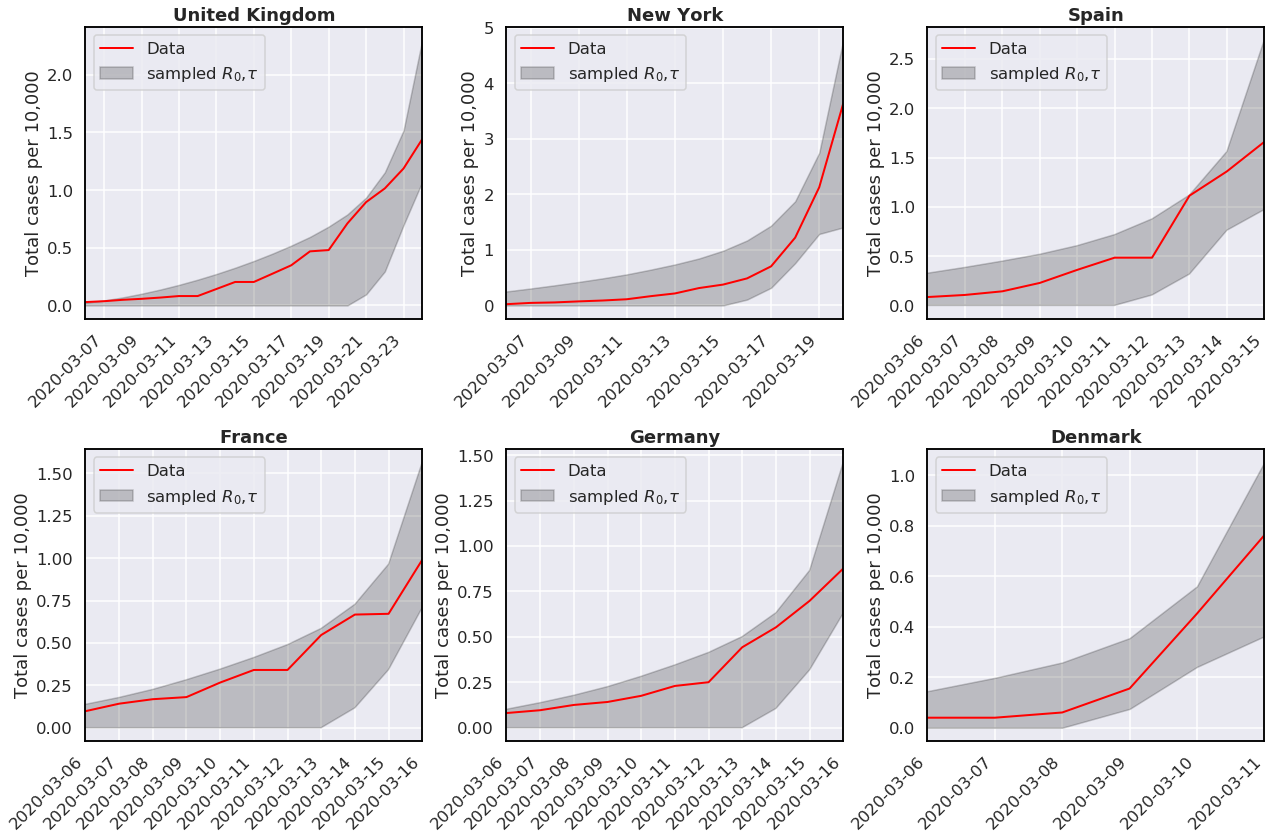

In [333]:
sim_date = '3/11/2020'
DATE_ADD = 0
PP=True
tau_str = r'$\tau$'

fig,axes = plt.subplots(2,3,figsize=(18,12),sharex=False); axes = axes.ravel()


for region,ax in zip(regions_plot,axes):
    print(region)
    x,country,output_file,N,sDate,eDate = data[region]
    print(sDate,eDate)

    dates = pd.date_range(sDate,eDate,freq='D',)
    dates2 = pd.date_range(sDate,periods=len(dates)+DATE_ADD,freq='D')
    r0s = []
    gammas = []
    n_zeros = len(x)-5


    k_mat = []
    for file_name in sim_files:


        gamma = float(file_name.stem.split('_')[-1])
        r0 = float(file_name.stem.split('_')[2])
        endDist = float(file_name.stem.split('_')[4])

        d = pd.read_csv(file_name,index_col=0).values*(N)
        d = np.insert(d,0,np.zeros(n_zeros))
        score,shift,_,_,_,alpha = findBestShift(x,d,norm=False,loss='LL')
        
        e = d[int(shift):int(shift)+len(x)+DATE_ADD]


        sde = pd.date_range(sim_date,periods=endDist,freq='D')[-1].strftime("%m/%Y")
        print(region,r0,gamma,sim_date,sde,sep='\t')

       
    
        k_mat.append(e)
        print(r0,gamma,shift,alpha,endDist)


    k_mat = np.array(k_mat)
    k_u = np.max(k_mat,axis=0)
    k_d = np.min(k_mat,axis=0)
    if(PP):
        ax.fill_between(dates2,k_u/(N*1e-4),k_d/(N*1e-4),alpha=0.2,color='k',label=f'sampled {R0_str},{tau_str}')
    else:
        ax.fill_between(dates2,k_u,k_d,alpha=0.2,color='k',label=f'sampled {R0_str},{gamma_str}')
    # True vals  
    if(PP):
        ax.plot(dates,x/(N*1e-4),label='Data',color='r',lw=2)
    else:
        ax.plot(dates,x,label='Data',color='r',lw=2)
        
    ax.set_title(f'{country}', fontweight='bold') #,fontsize=14
    if(PP):
        ax.set_ylabel('Total cases per 10,000')
    else:
        ax.set_ylabel(f'Total cases')
        
    ax.legend(loc='upper left')
    print(ax.get_xticklabels())
    if(region=='Sweden'): ax.set_xticks(dates[::-7])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_xlim(('3/6/2020',dates2[-1]))
#     ax.set_ylim((-1,10))
    
# fig.subplots_adjust(bottom=0.2)   
plt.tight_layout()
fig.subplots_adjust(wspace=0.25)



## End distribution 

In [298]:
endDist_l = []
endDist_l2 = []
for file_name in sim_files:
    gamma = float(file_name.stem.split('_')[-1])
    r0 = float(file_name.stem.split('_')[2])
    endDist = float(file_name.stem.split('_')[4])
    endDist_l.append(endDist)
    endDist_l2.append(pd.date_range(sim_date,periods=endDist,freq='D')[-1])

3/11/2020
08/2020, 10/2020, 3.936576578847849


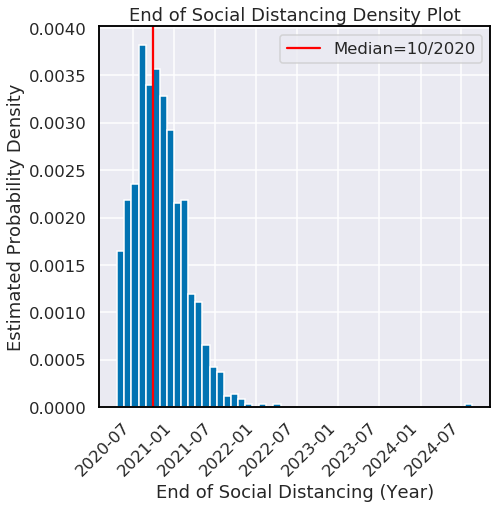

In [323]:
fig,ax = plt.subplots(figsize=(7,7))
from datetime import datetime

# a = ax.hist(endDist_l2,bins=50,range=('2020','2029'),density=True,)
a = ax.hist(endDist_l2,bins=50,density=True,)
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel('End of Social Distancing (Year)')
ax.set_ylabel('Estimated Probability Density')
b = ax.get_xticks()

max_date = np.max(endDist_l)*0.99
mode_array = np.array(endDist_l)[endDist_l < max_date]

end_mode = datetime.fromordinal(int(a[1][np.argmax(a[0])+1])).strftime("%m/%Y")
end_mean = np.mean(endDist_l)
end_med = np.median(endDist_l)

med_date = pd.date_range(sim_date,periods=end_med,freq='D')[-1].strftime("%m/%Y")
print(sim_date)
print(end_mode,med_date,np.std(endDist_l)/30,sep=', ' )
ax.axvline(med_date,color='r',label=f'Median={med_date}')

ax.set_title(f'End of Social Distancing Density Plot')
ax.legend()



## summary stats 

In [230]:
import scipy.stats as stats

In [170]:
from datetime import datetime

In [304]:
max_date = np.max(endDist_l)*0.99
mode_array = np.array(endDist_l)[endDist_l < max_date]

end_mode = datetime.fromordinal(int(a[1][np.argmax(a[0])+1])).strftime("%m/%Y")
end_mean = np.mean(endDist_l)
end_med = np.median(endDist_l)

print(sim_date)
print(end_mode,end_mean,end_med,sep=', ' )

end_mode,pd.date_range(sim_date,periods=end_mean,freq='D')[-1].strftime("%m/%Y"),pd.date_range(sim_date,periods=end_med,freq='D')[-1].strftime("%m/%Y")



3/11/2020
09/2020, 237.91689008042894, 223.0


('09/2020', '11/2020', '10/2020')

## Show number of cases under social distance regime 

endDist:  402.0
endDist:  1084.0
endDist:  1999.0


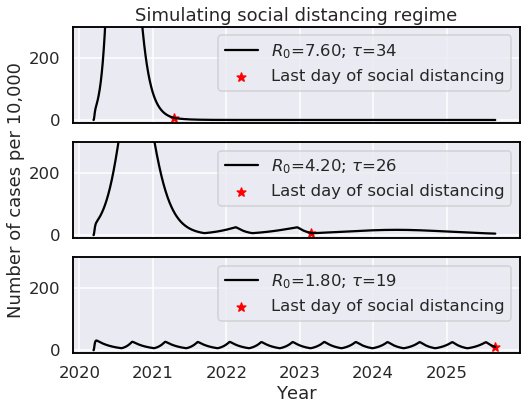

In [142]:
sim_date = '3/11/2020';
fig,axes = plt.subplots(3,1,figsize=(8,6),sharex=True,sharey=True); axes = axes.ravel()
import matplotlib.dates as mdates
text_date = pd.datetime(2021,6,1)


# region = 'Spain'
# sims = [
#     'sick_r0_7.6000_endDist_152.0_nu_4.6_gamma_11.0000.csv',
#     'sick_r0_3.4000_endDist_940.0_nu_4.6_gamma_7.0000.csv',
#     'sick_r0_3.6000_endDist_1052.0_nu_4.6_gamma_11.0000.csv',
    
# ]

region = 'France'
sims = [
    'sick_r0_7.6000_endDist_402.0_nu_4.6_gamma_34.0000.csv',
    'sick_r0_4.2000_endDist_1084.0_nu_4.6_gamma_26.0000.csv',
    'sick_r0_1.8000_endDist_1999.0_nu_4.6_gamma_19.0000.csv'
]

x,country,output_file,N,sDate,eDate = data[region]


i=0
for fsim,ax in zip(sims,axes):
    fsim = Path(fsim)
    sick_sim = pd.read_csv(fsim,index_col=0)
    nsim = sick_sim.shape[0]
    
    gamma = float(fsim.stem.split('_')[-1])
    r0 = float(fsim.stem.split('_')[2])
    endDist = float(fsim.stem.split('_')[4])
    endDate = pd.date_range(sim_date,periods=endDist,freq='D')[-1]
    print('endDist: ', endDist)
    
    
    
    dsim = pd.date_range(sim_date,periods=nsim,freq='D')
    sim_y = (N/10000)*sick_sim.x.values
    ax.plot(dsim,sim_y,label=f'{R0_str}={r0:.2f}; {tau_str}={gamma:.0f}',color='k')
    
    if(i==2): ax.set_xlabel('Year')
    if(i==1): ax.set_ylabel('Number of cases per 10,000')
    if(i==0): ax.set_title('Simulating social distancing regime')
    ax.set_ylim((-10,300))
    ax.scatter(mdates.date2num(endDate),sim_y[int(endDist)],color='r',marker='*',label = 'Last day of social distancing')
    ax.legend()
    i+=1
#     ax.annotate("Last day of social distancing", xy=(mdates.date2num(endDate),sim_y[int(endDist)]),
#                 xytext=(mdates.date2num(text_date), 0.02*(N/10000)), 
#                 arrowprops=dict(arrowstyle="->",color='red'))
    
# ax.set_ylim((-0.001,0.045))

# ax.set_ylim((-3,220))
# ax.set_ylim((-3,100))
# fig.tight_layout()

